<a href="https://colab.research.google.com/github/Wsouza36/Ciencia-de-Dados---PUC/blob/main/MVP_CD_An%C3%A1lise_Financeira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP de Análise de Dados e Boas Práticas**

##Profs. Tatiana Escovedo e Hugo Villamizar

## Aluno Welton Benedito de Souza

### MVP Análise de dados financeiros de empresas petroleiras júniores em 2022

## **1. Definição do Problema**



O projeto de aprendizado supervisionado é composto por datasets de demonstração e relatórios financeiros das empresas registradas na CVM (Comissão de Valores Mobiliários) e informações do mercado financeiro como número de ações em circulação e a cotação da ações no IBOVESPA. Objetivo do projeto é avaliar as alternativas de investimento em ações de empresas através de um estudo da situação financeira e das perpectivas das empresas. A utilização de um dos aspectos da análise fundamentalista para encontrar o valor real de uma empresa para investimento com foco no longo prazo.

As empresas selecionadas para análise, neste projeto, são empresas independentes de óleo e gás natural no Brasil, chamadas empresas **petroleiras júniores** ou **"Junior Oils"**.

As **"Junior Oils"** operam hoje em mais de 180 campos de exploração de petróleo e gás, tiveram um crescimento considerável impulsionado pela aquisição de ativos da Petrobras por meio do plano de desinvestimento inciado em 2015, ainda no Governo Dilma Rousseff. A produção em bacias terrestres, que estava em declínio desde 2012, passou aumentar substancialmente com a entrada dessas empresas, além revitalização de campos maduros de petróleo e gás natural offshore.

Os datasetes apresentam diversos atributos, variáveis preditoras, que contribue para o calculo dos diversos indicadores financeiros e econômicos, variavéis de respostas.

Para mais detalhes sobre este dataset, consulte:https://dados.cvm.gov.br/dados/CIA_ABERTA/DOC/DFP/DADOS/dfp_cia_aberta_2022.zip

**Informações sobre os datasets:**
1. **DRE**   - Demonstração do Resultado do Exercício 
2. **BPA**   - Balanço Patrimonial do Ativo
3. **BPP**   - Balanço Patrimonial do Passivo
4. **yahoo** - Site do Yahoo Finance


**Informações sobre os atributos(variáveis preditoras):**
1. **DENOM_CIA**    - Denominação da empresa 
2. **CD_CVM**       - Código da empresa na CVM
3. **DT_INI_EXERC** - Data inicial do exercício 
4. **DT_FIM_EXERC** - Data final do exercício 
5. **CD_CONTA**     - Código da conta contábil 
6. **DS_CONTA**     - Descrição da conta contábil 
7. **VL_CONTA**     - Valor da conta 
8. **GRUPO_DFP**    - Grupo da Demonstração Financeira Patrimonial
9. **Close**        - Preços de fechamento da ação
10. **Quote**       - Número de ações de empresa

### 1.1 - Aplicação analítica

As diversas bibliotecas (Python Data Analysis Library) aplicadas para exploração e análise deste projeto

In [151]:
#Instalação de bibliotecas python

!pip install zipfile36
!pip install pandas
!pip install pandas-datareader
!pip install numpy
!pip install requests
!pip install plotly
!pip install yahoo_fin
!pip install fundamentus
!pip install matplotlib==3.5.3
!pip install seaborn
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in

In [152]:
#Importação de bibliotecas
import zipfile
import io
import pandas as pd
from pandas import set_option
from pandas.plotting import scatter_matrix
import numpy as np
import requests
import time
import plotly
import os
import plotly.graph_objects as go
import fundamentus
import pandas_datareader as pdr
from yahoo_fin import stock_info as si
import matplotlib as mpl
from matplotlib.patches import Patch, Polygon
from matplotlib.lines import Line2D
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import missingno as ms # para tratamento de missings
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")
import warnings
## Transformações Numéricas
from sklearn.preprocessing import MinMaxScaler # normalização
from sklearn.preprocessing import StandardScaler # padronização
## Transformações Categóricas
from sklearn.preprocessing import OrdinalEncoder # ordinal encoding
from sklearn.preprocessing import OneHotEncoder # one-hot encoding e dummy encoding
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

## **2. Carga de Dados**

### 2.1 - **Dados** da DRE





Através dos pacote zipfile, requests, pandas (Python Data Analysis Library) carregaremos um arquivo .csv da demonstração do resultado do exercício contido na arquivo zipado no github disponível online para exploração dos dados




In [153]:
#o objeto "arquivo" é o nome do arquivo que corresponde ao dataset das demonstrações de resultado de 2022 das empresas na CVM contido no arquivo zipado
arquivo= 'dfp_cia_aberta_DRE_ind_2022.csv'
# o objeto "link" corresponde ao caminho onde de encontrar o arquivo zipado no github
link = r'https://github.com/Wsouza36/Ciencia-de-Dados---PUC/blob/main/dfp_cia_aberta_2022.zip?raw=true'
#O objeto "arquivo_zip" obtem-se o arquivo do caminho "link"
arquivo_zip = requests.get(link)
#Acessar o conteudo da arquivo zipada
zp=zipfile.ZipFile(io.BytesIO(arquivo_zip.content))
#Objeto do arquivo zipado
zp
#Abrir o arquivo do objeto "arquivo"
DRE=zp.open(arquivo)
#Ler o conteudo do arquivo
linhas = DRE.readlines()
#Para cada linha no arquivo DRE remova-se espaço em excesso em uma lista
lines = [i.strip().decode('ISO-8859-1')for i in linhas]
#Para cada linha no arquivo DRE separa os objetos a cada ; em uma lista
lines = [i.split(';')for i in lines]
#Criar o dataframe da 1º linha em diante da lista lines e a coluna será o próprio indice 0 lista lines
df_DRE = pd.DataFrame(lines[1:], columns = lines[0])

In [154]:
#Mostrar as primeiras linhas do dataframe df_DRE
df_DRE.head()

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_INI_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
0,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.01,Receitas de Intermediação Financeira,130254642.0000000000,S
1,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-01-01,2022-12-31,3.01,Receitas de Intermediação Financeira,229637958.0000000000,S
2,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.01.01,Operações de Crédito,84254592.0000000000,N
3,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-01-01,2022-12-31,3.01.01,Operações de Crédito,113112904.0000000000,N
4,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.01.02,Operações de Arrendamento Mercantil,0.0000000000,N


### 2.2 - Dados do BPA

Através dos pacote zipfile, requests, pandas (Python Data Analysis Library) carregaremos um arquivo .csv da balanço patrimonial do ativo contido na arquivo zipado no github disponível online para exploração dos dados

In [155]:
#o objeto "arquivo" é o nome do arquivo que corresponde ao dataset do balanço patrimonial do ativo de 2022 das empresas na CVM contido no arquivo zipado
arquivo= 'dfp_cia_aberta_BPA_ind_2022.csv'
# o objeto "link" corresponde ao caminho onde de encontrar o arquivo zipado no github
link = r'https://github.com/Wsouza36/Ciencia-de-Dados---PUC/blob/main/dfp_cia_aberta_2022.zip?raw=true'
#O objeto "arquivo_zip" obtem-se o arquivo do caminho "link"
arquivo_zip = requests.get(link)
#Acessar o conteudo da arquivo zipada
zp=zipfile.ZipFile(io.BytesIO(arquivo_zip.content))
#Objeto do arquivo zipado
zp
#Abrir o arquivo do objeto "arquivo"
BPA=zp.open(arquivo)
#Ler o conteudo do arquivo
linhas = BPA.readlines()
#Para cada linha no arquivo DRE remova-se espaço em excesso em uma lista
lines = [i.strip().decode('ISO-8859-1')for i in linhas]
#Para cada linha no arquivo DRE separa os objetos a cada ; em uma lista
lines = [i.split(';')for i in lines]
#Criar o dataframe da 1º linha em diante da lista lines e a coluna será o próprio indice 0 lista lines
df_BPA = pd.DataFrame(lines[1:], columns = lines[0])

In [156]:
#Mostrar as primeiras linhas do dataframe df_BPA
df_BPA.head()

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
0,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Ativo,REAL,MIL,PENÚLTIMO,2021-12-31,1,Ativo Total,1988645574.0000000000,S
1,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,2022-12-31,1,Ativo Total,2062674549.0000000000,S
2,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Ativo,REAL,MIL,PENÚLTIMO,2021-12-31,1.01,Caixa e Equivalentes de Caixa,51538341.0000000000,S
3,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,2022-12-31,1.01,Caixa e Equivalentes de Caixa,67891204.0000000000,S
4,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Ativo,REAL,MIL,PENÚLTIMO,2021-12-31,1.01.01,Caixa,15285225.0000000000,S


### 2.3 - Dados do BPP

Através dos pacote zipfile, requests, pandas (Python Data Analysis Library) carregaremos um arquivo .csv do balanço patrimonial do passivo contido na arquivo zipado no github disponível online para exploração dos dados

In [157]:
#o objeto "arquivo" é o nome do arquivo que corresponde ao dataset do balanço patrimonial do passivo de 2022 das empresas na CVM contido no arquivo zipado
arquivo= 'dfp_cia_aberta_BPP_ind_2022.csv'
# o objeto "link" corresponde ao caminho onde de encontrar o arquivo zipado no github
link = r'https://github.com/Wsouza36/Ciencia-de-Dados---PUC/blob/main/dfp_cia_aberta_2022.zip?raw=true'
#O objeto "arquivo_zip" obtem-se o arquivo do caminho "link"
arquivo_zip = requests.get(link)
#Acessar o conteudo da arquivo zipada
zp=zipfile.ZipFile(io.BytesIO(arquivo_zip.content))
#Objeto do arquivo zipado
zp
#Abrir o arquivo do objeto "arquivo"
BPP=zp.open(arquivo)
#Ler o conteudo do arquivo
linhas = BPP.readlines()
#Para cada linha no arquivo DRE remova-se espaço em excesso em uma lista
lines = [i.strip().decode('ISO-8859-1')for i in linhas]
#Para cada linha no arquivo DRE separa os objetos a cada ; em uma lista
lines = [i.split(';')for i in lines]
#Criar o dataframe da 1º linha em diante da lista lines e a coluna será o próprio indice 0 lista lines
df_BPP = pd.DataFrame(lines[1:], columns = lines[0])

In [158]:
#Mostrar as primeiras linhas do dataframe df_BPP
df_BPP.head()

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
0,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Passivo,REAL,MIL,PENÚLTIMO,2021-12-31,2,Passivo Total,1988645574.0000000000,S
1,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Passivo,REAL,MIL,ÚLTIMO,2022-12-31,2,Passivo Total,2062674549.0000000000,S
2,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Passivo,REAL,MIL,PENÚLTIMO,2021-12-31,2.01,Passivos Financeiros Avaliados ao Valor Justo ...,4108597.0000000000,S
3,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Passivo,REAL,MIL,ÚLTIMO,2022-12-31,2.01,Passivos Financeiros Avaliados ao Valor Justo ...,3512533.0000000000,S
4,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Passivo,REAL,MIL,PENÚLTIMO,2021-12-31,2.01.01,Instrumentos financeiros derivativos,4108597.0000000000,N


## **3. Análise de Dados**

### 3.1. Estatísticas Descritivas

Exame das dimensões do dataset e suas informações 

#### 3.1.1 Dimensões do datasets

In [159]:
# Mostra as dimensões dos datasets em um dataframe
DP = pd.DataFrame({
    'Dataframe': ['df_DRE', 'df_BPA', 'df_BPP'],
    'Linhas': [df_DRE.shape[0], df_BPA.shape[0], df_BPP.shape[0]],
    'Colunas': [df_DRE.shape[1], df_BPA.shape[1], df_BPP.shape[1]]})
DP

,Dataframe,Linhas,Colunas
0,df_DRE,44666,15
1,df_BPA,89951,14
2,df_BPP,151884,14


#### 3.1.2 Informações dos datasets

In [160]:
# Mostra as informações do dataset
print(df_DRE.info())
print(df_BPA.info())
print(df_BPP.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44666 entries, 0 to 44665
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CNPJ_CIA       44666 non-null  object
 1   DT_REFER       44666 non-null  object
 2   VERSAO         44666 non-null  object
 3   DENOM_CIA      44666 non-null  object
 4   CD_CVM         44666 non-null  object
 5   GRUPO_DFP      44666 non-null  object
 6   MOEDA          44666 non-null  object
 7   ESCALA_MOEDA   44666 non-null  object
 8   ORDEM_EXERC    44666 non-null  object
 9   DT_INI_EXERC   44666 non-null  object
 10  DT_FIM_EXERC   44666 non-null  object
 11  CD_CONTA       44666 non-null  object
 12  DS_CONTA       44666 non-null  object
 13  VL_CONTA       44666 non-null  object
 14  ST_CONTA_FIXA  44666 non-null  object
dtypes: object(15)
memory usage: 5.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89951 entries, 0 to 89950
Data columns (total 14 columns):
 #   

#### 3.1.3 - 10 primeiras linhas de cada dataset

In [161]:
# Mostra as 10 primeiras linhas de cada dataset_DRE
df_DRE.head(10)

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_INI_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
0,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.01,Receitas de Intermediação Financeira,130254642.0000000000,S
1,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-01-01,2022-12-31,3.01,Receitas de Intermediação Financeira,229637958.0000000000,S
2,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.01.01,Operações de Crédito,84254592.0000000000,N
3,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-01-01,2022-12-31,3.01.01,Operações de Crédito,113112904.0000000000,N
4,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.01.02,Operações de Arrendamento Mercantil,0.0000000000,N
5,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-01-01,2022-12-31,3.01.02,Operações de Arrendamento Mercantil,0.0000000000,N
6,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.01.03,Resultado de Operações com TVM,42786793.0000000000,N
7,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-01-01,2022-12-31,3.01.03,Resultado de Operações com TVM,109331847.0000000000,N
8,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.01.04,Resultado de IFD,1257206.0000000000,N
9,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-01-01,2022-12-31,3.01.04,Resultado de IFD,-883493.0000000000,N


In [162]:
# Mostra as 10 primeiras linhas de cada dataset_BPA
df_BPA.head(10)

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
0,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Ativo,REAL,MIL,PENÚLTIMO,2021-12-31,1,Ativo Total,1988645574.0000000000,S
1,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,2022-12-31,1,Ativo Total,2062674549.0000000000,S
2,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Ativo,REAL,MIL,PENÚLTIMO,2021-12-31,1.01,Caixa e Equivalentes de Caixa,51538341.0000000000,S
3,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,2022-12-31,1.01,Caixa e Equivalentes de Caixa,67891204.0000000000,S
4,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Ativo,REAL,MIL,PENÚLTIMO,2021-12-31,1.01.01,Caixa,15285225.0000000000,S
5,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,2022-12-31,1.01.01,Caixa,12808085.0000000000,S
6,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Ativo,REAL,MIL,PENÚLTIMO,2021-12-31,1.01.02,Aplicações de Liquidez,36253116.0000000000,S
7,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,2022-12-31,1.01.02,Aplicações de Liquidez,55083119.0000000000,S
8,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Ativo,REAL,MIL,PENÚLTIMO,2021-12-31,1.02,Ativos Financeiros,1798690748.0000000000,S
9,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,2022-12-31,1.02,Ativos Financeiros,1841073746.0000000000,S


In [163]:
# Mostra as 10 primeiras linhas de cada dataset_BPP
df_BPP.head(10)

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
0,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Passivo,REAL,MIL,PENÚLTIMO,2021-12-31,2,Passivo Total,1988645574.0000000000,S
1,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Passivo,REAL,MIL,ÚLTIMO,2022-12-31,2,Passivo Total,2062674549.0000000000,S
2,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Passivo,REAL,MIL,PENÚLTIMO,2021-12-31,2.01,Passivos Financeiros Avaliados ao Valor Justo ...,4108597.0000000000,S
3,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Passivo,REAL,MIL,ÚLTIMO,2022-12-31,2.01,Passivos Financeiros Avaliados ao Valor Justo ...,3512533.0000000000,S
4,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Passivo,REAL,MIL,PENÚLTIMO,2021-12-31,2.01.01,Instrumentos financeiros derivativos,4108597.0000000000,N
5,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Passivo,REAL,MIL,ÚLTIMO,2022-12-31,2.01.01,Instrumentos financeiros derivativos,3512533.0000000000,N
6,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Passivo,REAL,MIL,PENÚLTIMO,2021-12-31,2.02,Passivos Financeiros ao Custo Amortizado,1771550882.0000000000,S
7,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Passivo,REAL,MIL,ÚLTIMO,2022-12-31,2.02,Passivos Financeiros ao Custo Amortizado,1833280625.0000000000,S
8,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Passivo,REAL,MIL,PENÚLTIMO,2021-12-31,2.02.01,Depósitos,1771550882.0000000000,S
9,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,001023,DF Individual - Balanço Patrimonial Passivo,REAL,MIL,ÚLTIMO,2022-12-31,2.02.01,Depósitos,1833280625.0000000000,S


#### 3.1.4 - 10 últimas linhas de cada dataset

In [164]:
# Mostra as 10 últimas linhas do dataset_DRE
df_DRE.tail(10)

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_INI_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
44656,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.99,Lucro por Ação - (Reais / Ação),0.0000000000,N
44657,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-01-01,2022-12-31,3.99,Lucro por Ação - (Reais / Ação),0.0000000000,N
44658,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.99.01,Lucro Básico por Ação,0.0000000000,N
44659,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-01-01,2022-12-31,3.99.01,Lucro Básico por Ação,0.0000000000,N
44660,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.99.01.01,ON,2.4903000000,N
44661,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-01-01,2022-12-31,3.99.01.01,ON,1.0178000000,N
44662,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.99.02,Lucro Diluído por Ação,0.0000000000,N
44663,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-01-01,2022-12-31,3.99.02,Lucro Diluído por Ação,0.0000000000,N
44664,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.99.02.01,ON,2.4754000000,N
44665,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-01-01,2022-12-31,3.99.02.01,ON,1.0144000000,N


In [165]:
# Mostra as 10 últimas linhas do dataset_BPA
df_BPA.tail(10)

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
89941,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Balanço Patrimonial Ativo,REAL,MIL,PENÚLTIMO,2021-12-31,1.02.04.01.04,Goodwill na Aquisição da Satipel em 2009,45503.0000000000,N
89942,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,2022-12-31,1.02.04.01.04,Goodwill na Aquisição da Satipel em 2009,45503.0000000000,N
89943,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Balanço Patrimonial Ativo,REAL,MIL,PENÚLTIMO,2021-12-31,1.02.04.01.05,Goodwill de Empresa Incorporada em 2010,0.0000000000,N
89944,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,2022-12-31,1.02.04.01.05,Goodwill de Empresa Incorporada em 2010,0.0000000000,N
89945,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Balanço Patrimonial Ativo,REAL,MIL,PENÚLTIMO,2021-12-31,1.02.04.01.06,Goodwill de Empresa Incorporada em 2011,0.0000000000,N
89946,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,2022-12-31,1.02.04.01.06,Goodwill de Empresa Incorporada em 2011,0.0000000000,N
89947,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Balanço Patrimonial Ativo,REAL,MIL,PENÚLTIMO,2021-12-31,1.02.04.01.07,Goodwill de Empresa Incorporada em 2012,2402.0000000000,N
89948,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,2022-12-31,1.02.04.01.07,Goodwill de Empresa Incorporada em 2012,2402.0000000000,N
89949,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Balanço Patrimonial Ativo,REAL,MIL,PENÚLTIMO,2021-12-31,1.02.04.01.08,Goodwill de Empresa Incorporada em 2014,0.0000000000,N
89950,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,2022-12-31,1.02.04.01.08,Goodwill de Empresa Incorporada em 2014,0.0000000000,N


In [166]:
# Mostra as 10 últimas linhas do dataset_BPP
df_BPP.tail(10)

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
151874,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Balanço Patrimonial Passivo,REAL,MIL,PENÚLTIMO,2021-12-31,2.03.04.09,Ações em Tesouraria,-103113.0000000000,S
151875,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Balanço Patrimonial Passivo,REAL,MIL,ÚLTIMO,2022-12-31,2.03.04.09,Ações em Tesouraria,-378017.0000000000,S
151876,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Balanço Patrimonial Passivo,REAL,MIL,PENÚLTIMO,2021-12-31,2.03.05,Lucros/Prejuízos Acumulados,0.0000000000,S
151877,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Balanço Patrimonial Passivo,REAL,MIL,ÚLTIMO,2022-12-31,2.03.05,Lucros/Prejuízos Acumulados,0.0000000000,S
151878,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Balanço Patrimonial Passivo,REAL,MIL,PENÚLTIMO,2021-12-31,2.03.06,Ajustes de Avaliação Patrimonial,681368.0000000000,S
151879,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Balanço Patrimonial Passivo,REAL,MIL,ÚLTIMO,2022-12-31,2.03.06,Ajustes de Avaliação Patrimonial,532105.0000000000,S
151880,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Balanço Patrimonial Passivo,REAL,MIL,PENÚLTIMO,2021-12-31,2.03.07,Ajustes Acumulados de Conversão,0.0000000000,S
151881,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Balanço Patrimonial Passivo,REAL,MIL,ÚLTIMO,2022-12-31,2.03.07,Ajustes Acumulados de Conversão,0.0000000000,S
151882,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Balanço Patrimonial Passivo,REAL,MIL,PENÚLTIMO,2021-12-31,2.03.08,Outros Resultados Abrangentes,0.0000000000,S
151883,97.837.181/0001-47,2022-12-31,1,DEXCO S.A.,021091,DF Individual - Balanço Patrimonial Passivo,REAL,MIL,ÚLTIMO,2022-12-31,2.03.08,Outros Resultados Abrangentes,0.0000000000,S


#### 3.1.5 - Resumo estatístico

In [167]:
# Faz um resumo estatístico do dataset_DRE
df_DRE.describe()

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_INI_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
count,44666,44666,44666,44666,44666,44666,44666,44666,44666,44666,44666,44666,44666,44666,44666
unique,683,5,4,683,683,1,1,2,2,19,9,225,1592,21808,2
top,15.144.017/0001-90,2022-12-31,1,CIA SEGUROS ALIANCA DA BAHIA,003115,DF Individual - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-01-01,2021-12-31,3.01,ON,0.0000000000,S
freq,142,43776,38390,142,142,44666,44666,42462,22347,21818,21994,1367,2164,16529,31569


In [168]:
# Faz um resumo estatístico do dataset_BPA
df_BPA.describe()

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
count,89951,89951,89951,89951,89951,89951,89951,89951,89951,89951,89951,89951,89951,89951
unique,683,5,4,683,683,1,1,2,2,9,355,2088,24080,2
top,26.345.998/0001-50,2022-12-31,1,TC S.A.,026077,DF Individual - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,2021-12-31,1,Despesas Antecipadas,0.0000000000,S
freq,248,87965,77531,248,248,89951,89951,85644,45004,44199,1367,2690,51932,70110


In [169]:
# Faz um resumo estatístico do dataset_BPP
df_BPP.describe()

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
count,151884,151884,151884,151884,151884,151884,151884,151884,151884,151884,151884,151884,151884,151884
unique,683,5,4,683,683,1,1,2,2,9,423,3445,31918,2
top,26.345.998/0001-50,2022-12-31,1,TC S.A.,026077,DF Individual - Balanço Patrimonial Passivo,REAL,MIL,ÚLTIMO,2021-12-31,2,Empréstimos e Financiamentos,0.0000000000,S
freq,436,148660,131054,436,436,151884,151884,144388,75993,74671,1367,5162,101224,133419


In [170]:
# Verifica a distribuição por empresas pela DRE
df_DRE.groupby('DENOM_CIA').size()

DENOM_CIA
3R PETROLEUM ÓLEO E GÁS S.A.                          66
524 PARTICIPACOES S.A.                                74
AEGEA SANEAMENTO E PARTICIPAÇÕES S.A.                 60
AERIS IND. E COM. DE EQUIP. PARA GER. DE ENG. S.A.    58
AES BRASIL ENERGIA S.A.                               56
                                                      ..
ZAMP SA                                               58
ÁGUAS DE TERESINA SANEAMENTO SPE S.A.                 60
ÁGUAS DO RIO 1 SPE S.A.                               60
ÁGUAS DO RIO 4 SPE S.A.                               60
ÁGUAS GUARIROBA S.A                                   60
Length: 683, dtype: int64

In [171]:
# Não há correlação de Pearson da DRE
df_DRE.corr(method = 'pearson')

""


### 3.2. Visualizações Unimodais e Multimoldais

As visualizações unimodais e multimoldais não são aplicaveis nestes datasets da Demonstração do Resultado do Exercíco e Balanço Patrimonial, por não se tratar de variáveis quantitativas discretas e contínuas. 

Entretanto, com base nos indicadores fundamentalistas das "Junior Oil" demonstraremos no apêndice as visualizações unimodais e multimoldais

## **4. Pré-Processamento de dados**

---



### 4.1. Tratamento de Missings e Limpeza

Estes datsets não tem missings e o valores "0" que parecem ser missings, também não pode ser considerados visto que são informações contábeis informada por cada empresas a CVM.


In [172]:
# verificando nulls no dataset
df_DRE.isnull().sum()
df_BPA.isnull().sum()
df_BPP.isnull().sum()

CNPJ_CIA         0
DT_REFER         0
VERSAO           0
DENOM_CIA        0
CD_CVM           0
GRUPO_DFP        0
MOEDA            0
ESCALA_MOEDA     0
ORDEM_EXERC      0
DT_FIM_EXERC     0
CD_CONTA         0
DS_CONTA         0
VL_CONTA         0
ST_CONTA_FIXA    0
dtype: int64

Considerando que o valores zero "0" são missings. Através de uma nova visão do dataset da Demonstração do Resultado trataremos os "missings"

<Axes: >

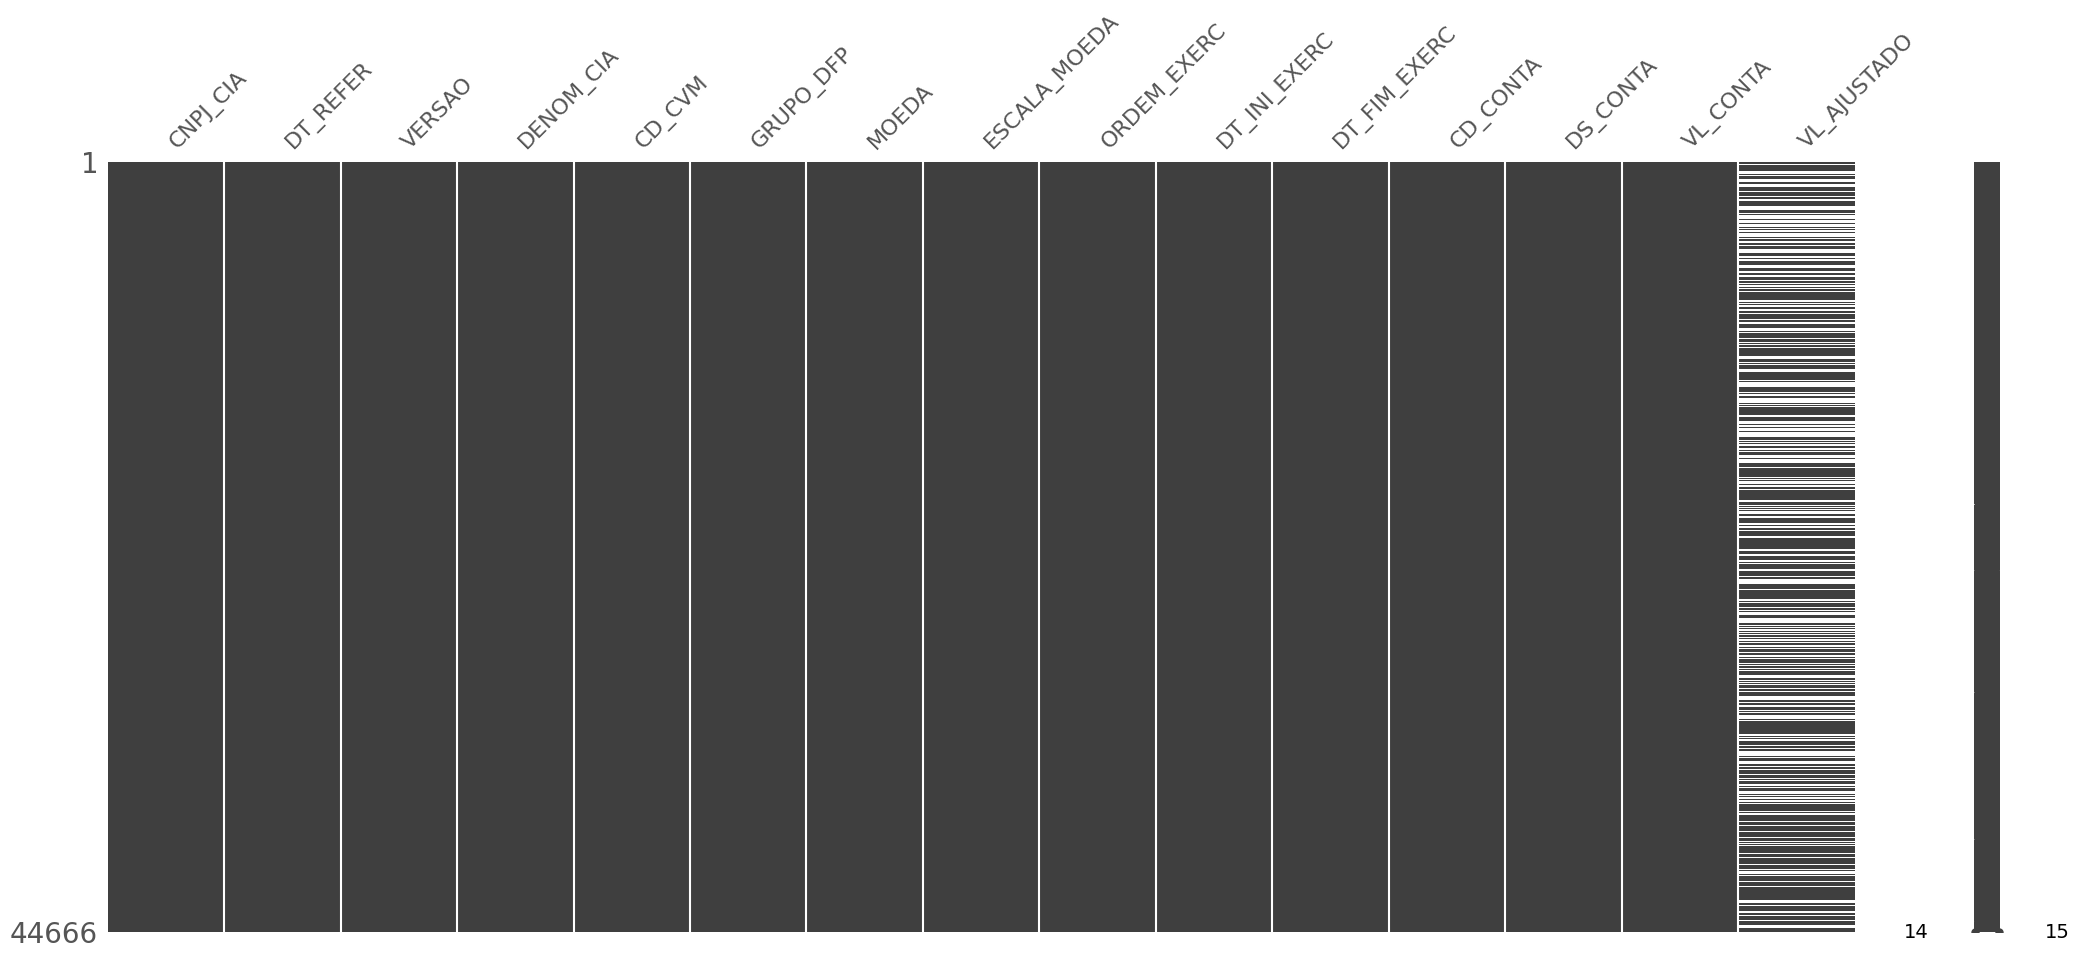

In [173]:
# recuperando os nomes das colunas
col = list(df_DRE.columns)

# o novo dataset irá conter todas as colunas com exceção da última (classe)
atributos = df_DRE[col[0:-1]]
# Criação de uma nova coluna "VL_AJUSTADO" convertida para número
atributos['VL_AJUSTADO'] = pd.to_numeric(atributos['VL_CONTA'])
# substituindo os zeros por NaN
atributos.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

<Axes: >

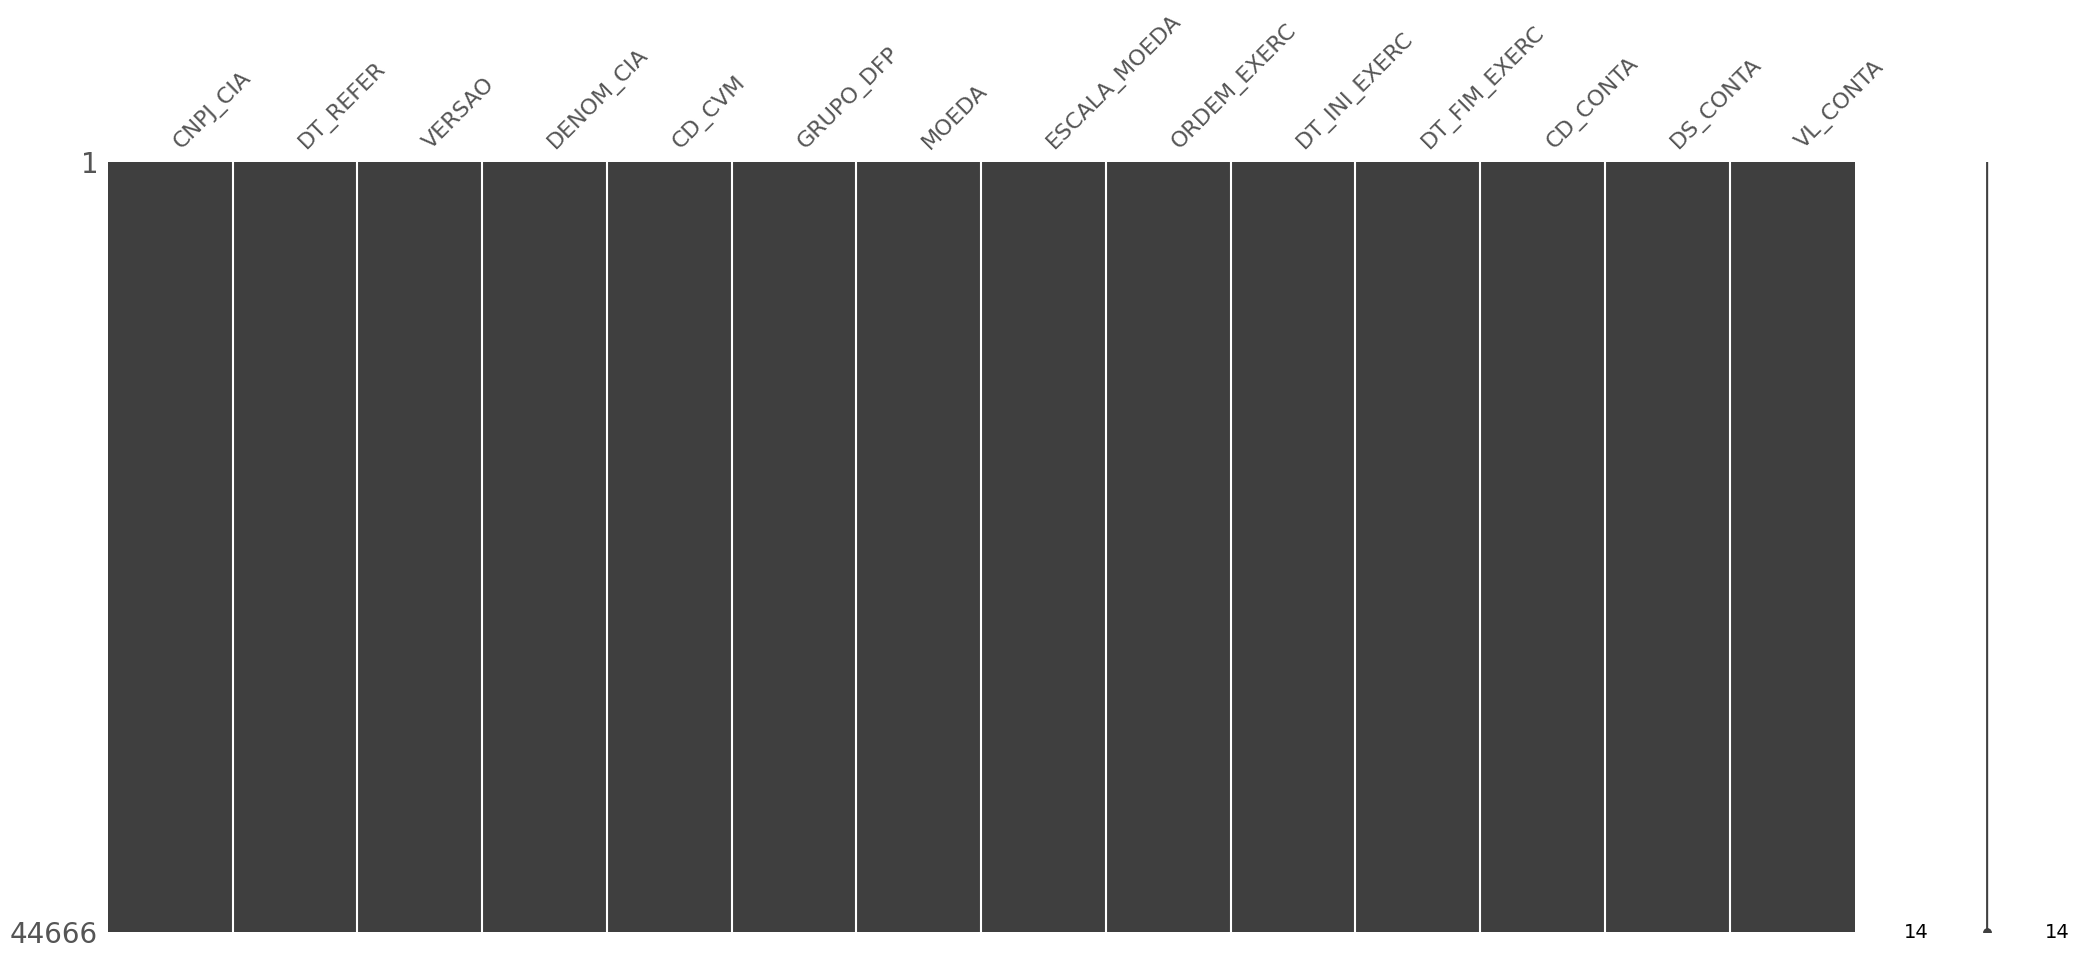

In [174]:
# removendo as colunas ''VL_AJUSTADO'
atributos.drop(['VL_AJUSTADO'], axis=1, inplace= True)
# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)


<Axes: >

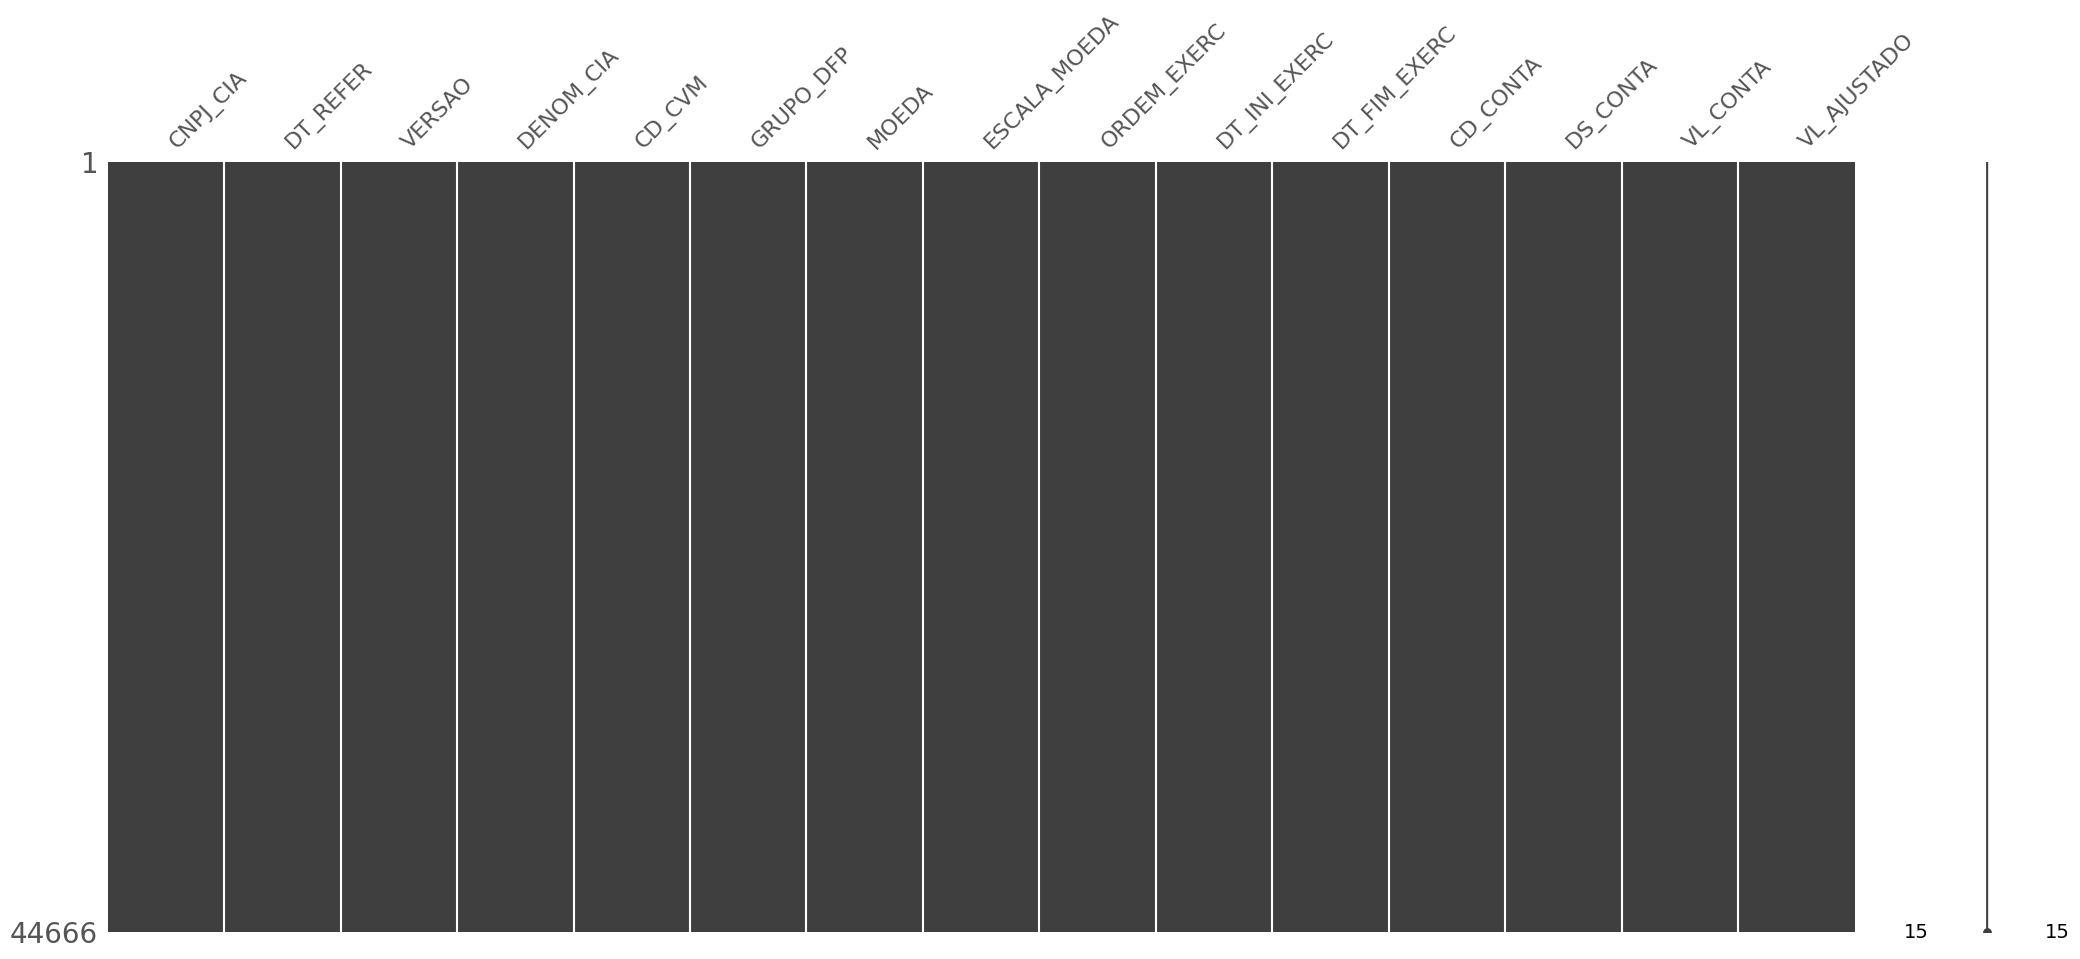

In [175]:
# recuperando os nomes das colunas
col = list(df_DRE.columns)

# o novo dataset irá conter todas as colunas com exceção da última (classe)
atributos = df_DRE[col[0:-1]]
# transformando objeto da coluna 'VL_CONTA' em formato numerico,valor, em outra coluna chamada 'VL_AJUSTADO' 
atributos['VL_AJUSTADO'] = pd.to_numeric(atributos['VL_CONTA'])
# substituindo os zeros por NaN
atributos.replace(0, np.nan, inplace=True)

# substituindo os NaN de 'preg' por 0
atributos['VL_AJUSTADO'].fillna(0, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

### 4.2. Amostragem



Nesta etapa apresentaremos as empresas selecionadas para análise, neste projeto, são empresas independentes de óleo e gás natural no Brasil, chamadas empresas petroleiras júniores ou "Junior Oils".

In [176]:
#Seleção das demonstrações financeiras das "Junior Oil" para o ano de 2022

#Remover demais demonstrações,manter somente DRE, BPA e BPA
demonstrativos = ['BPA','DRE','BPP']

#Seleção através do CD_CVM(código da CVM) 
empresas = ['25291', '22365', '22187', '25780']
# Listar de todos dos demonstrativos de todas as empresas selecionadas
lista_listas = []

# criar um loop que vai fazer a captura dos demonstrativos selecionados de uma vez, e depois fazer um loop filtrando por empresas específicas
for j in empresas:
    
    # Lista responsável por armazenar todos os demonstrativos selecionado para cada empresa selecionada
    lista_df=[]

    for k in demonstrativos:

        # O objeto "link" corresponde ao caminho onde de encontrar o arquivo zipado no github
        link = r'https://github.com/Wsouza36/Ciencia-de-Dados---PUC/blob/main/dfp_cia_aberta_2022.zip?raw=true'
        # O objeto "arquivo_zip" obtem-se o arquivo do caminho "link"  
        arquivo_zip = requests.get(link)
        # Acessar o conteudo da arquivo zipada
        zp=zipfile.ZipFile(io.BytesIO(arquivo_zip.content))
        # Concatenar cada elemento string dos nomes dos arquivos de acordo com demonstrativos selecionados
        arquivo1= 'dfp_cia_aberta_' + str(k) + '_con_2022.csv'
        # Abrir o arquivo do objeto "arquivo1"
        dados=zp.open(arquivo1)
        # Ler o conteudo do arquivo
        linhas = dados.readlines()
        # Para cada linha de cada arquivo, remova-se espaço em excesso em uma lista
        lines = [i.strip().decode('ISO-8859-1')for i in linhas]
        #Para cada linha de cada arquivo separa os objetos a cada ; em uma lista
        lines = [i.split(';')for i in lines]
        #Criar o dataframe da 1º linha em diante da lista lines e a coluna será o próprio indice 0 lista lines
        df = pd.DataFrame(lines[1:], columns = lines[0])         
        # transformando objeto da coluna 'VL_CONTA' em formato numerico e tipo de dado como float em outra coluna chamada 'VL_AJUSTADO' 
        df['VL_AJUSTADO'] = pd.to_numeric(df['VL_CONTA'], downcast='float')
        # transformando objeto da coluna 'DT_FIM_EXERC' em formato de data e hora para DD/MM/AAAA 
        df['DT_FIM_EXERC'] = pd.to_datetime(df['DT_FIM_EXERC'], dayfirst=True)
        # Filtrar o dataset pela empresas selecionadas de acordo com código da CVM e que a data fim seja maior que 01/01/2022
        filtro = df[(df['CD_CVM'] == '0'+ str(j)) & (df['DT_FIM_EXERC'] >= '2022-01-01')]
        # Adicionar todos os dataframes selecionados de acordo com os critérios de seleção das empresas e demonstrativos          
        lista_df.append(filtro) 
        # Monitoriar o processo de extração de acordo com os critérios selecionados e suas dimensões   
        print(f'Trabalhando com a empresa {j} e seu demostrantivo {k}. As dimensões são {filtro.shape}')
    #  Adicionar todos os dataframes de todas as empresas           
    lista_listas.append(lista_df)

Trabalhando com a empresa 25291 e seu demostrantivo BPA. As dimensões são (69, 15)
Trabalhando com a empresa 25291 e seu demostrantivo DRE. As dimensões são (36, 16)
Trabalhando com a empresa 25291 e seu demostrantivo BPP. As dimensões são (117, 15)
Trabalhando com a empresa 22365 e seu demostrantivo BPA. As dimensões são (65, 15)
Trabalhando com a empresa 22365 e seu demostrantivo DRE. As dimensões são (36, 16)
Trabalhando com a empresa 22365 e seu demostrantivo BPP. As dimensões são (122, 15)
Trabalhando com a empresa 22187 e seu demostrantivo BPA. As dimensões são (65, 15)
Trabalhando com a empresa 22187 e seu demostrantivo DRE. As dimensões são (41, 16)
Trabalhando com a empresa 22187 e seu demostrantivo BPP. As dimensões são (117, 15)
Trabalhando com a empresa 25780 e seu demostrantivo BPA. As dimensões são (70, 15)
Trabalhando com a empresa 25780 e seu demostrantivo DRE. As dimensões são (36, 16)
Trabalhando com a empresa 25780 e seu demostrantivo BPP. As dimensões são (119, 15)


In [177]:
#Preparar a demonstração do resultado do exercício
df_demonstrativo_DRE = pd.concat([pd.concat(lista_df) for lista_df in lista_listas], axis=0)
#Filtrar o dataframe da demostração do resultado
dre = df_demonstrativo_DRE[df_demonstrativo_DRE['GRUPO_DFP'] == 'DF Consolidado - Demonstração do Resultado']
#Exibe o dataframe
dre

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA,VL_AJUSTADO,DT_INI_EXERC
11981,12.091.809/0001-55,2022-12-31,1,3R PETROLEUM ÓLEO E GÁS S.A.,025291,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-12-31,3.01,Receita de Venda de Bens e/ou Serviços,1722422.0000000000,S,1722422.0,2022-01-01
11983,12.091.809/0001-55,2022-12-31,1,3R PETROLEUM ÓLEO E GÁS S.A.,025291,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-12-31,3.02,Custo dos Bens e/ou Serviços Vendidos,-835544.0000000000,S,-835544.0,2022-01-01
11985,12.091.809/0001-55,2022-12-31,1,3R PETROLEUM ÓLEO E GÁS S.A.,025291,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-12-31,3.03,Resultado Bruto,886878.0000000000,S,886878.0,2022-01-01
11987,12.091.809/0001-55,2022-12-31,1,3R PETROLEUM ÓLEO E GÁS S.A.,025291,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-12-31,3.04,Despesas/Receitas Operacionais,-615821.0000000000,S,-615821.0,2022-01-01
11989,12.091.809/0001-55,2022-12-31,1,3R PETROLEUM ÓLEO E GÁS S.A.,025291,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-12-31,3.04.01,Despesas com Vendas,0.0000000000,S,0.0,2022-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4237,03.342.704/0001-30,2022-12-31,1,PETRORECÔNCAVO S.A.,025780,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-12-31,3.11.01,Atribuído a Sócios da Empresa Controladora,1153391.0000000000,S,1153391.0,2022-01-01
4239,03.342.704/0001-30,2022-12-31,1,PETRORECÔNCAVO S.A.,025780,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-12-31,3.11.02,Atribuído a Sócios Não Controladores,0.0000000000,S,0.0,2022-01-01
4241,03.342.704/0001-30,2022-12-31,1,PETRORECÔNCAVO S.A.,025780,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-12-31,3.99,Lucro por Ação - (Reais / Ação),0.0000000000,N,0.0,2022-01-01
4243,03.342.704/0001-30,2022-12-31,1,PETRORECÔNCAVO S.A.,025780,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-12-31,3.99.01,Lucro Básico por Ação,0.0000000000,N,0.0,2022-01-01


In [178]:
#Preparar o balanço patrimonial do ativo
df_demonstrativo_BPA = pd.concat([pd.concat(lista_df) for lista_df in lista_listas], axis=0)
#Filtrar o dataframe da demostração do resultado
bpa = df_demonstrativo_BPA[df_demonstrativo_BPA['GRUPO_DFP'] == 'DF Consolidado - Balanço Patrimonial Ativo']
#Exibe o dataframe
bpa 

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA,VL_AJUSTADO,DT_INI_EXERC
23143,12.091.809/0001-55,2022-12-31,1,3R PETROLEUM ÓLEO E GÁS S.A.,025291,DF Consolidado - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,2022-12-31,1,Ativo Total,7971135.0000000000,S,7971135.0,NaN
23145,12.091.809/0001-55,2022-12-31,1,3R PETROLEUM ÓLEO E GÁS S.A.,025291,DF Consolidado - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,2022-12-31,1.01,Ativo Circulante,1570700.0000000000,S,1570700.0,NaN
23147,12.091.809/0001-55,2022-12-31,1,3R PETROLEUM ÓLEO E GÁS S.A.,025291,DF Consolidado - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,2022-12-31,1.01.01,Caixa e Equivalentes de Caixa,800442.0000000000,S,800442.0,NaN
23149,12.091.809/0001-55,2022-12-31,1,3R PETROLEUM ÓLEO E GÁS S.A.,025291,DF Consolidado - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,2022-12-31,1.01.02,Aplicações Financeiras,31353.0000000000,S,31353.0,NaN
23151,12.091.809/0001-55,2022-12-31,1,3R PETROLEUM ÓLEO E GÁS S.A.,025291,DF Consolidado - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,2022-12-31,1.01.02.01,Aplicações Financeiras Avaliadas a Valor Justo...,0.0000000000,S,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7871,03.342.704/0001-30,2022-12-31,1,PETRORECÔNCAVO S.A.,025780,DF Consolidado - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,2022-12-31,1.02.04,Intangível,11997.0000000000,S,11997.0,NaN
7873,03.342.704/0001-30,2022-12-31,1,PETRORECÔNCAVO S.A.,025780,DF Consolidado - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,2022-12-31,1.02.04.01,Intangíveis,11997.0000000000,S,11997.0,NaN
7875,03.342.704/0001-30,2022-12-31,1,PETRORECÔNCAVO S.A.,025780,DF Consolidado - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,2022-12-31,1.02.04.01.01,Contrato de Concessão,0.0000000000,S,0.0,NaN
7877,03.342.704/0001-30,2022-12-31,1,PETRORECÔNCAVO S.A.,025780,DF Consolidado - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,2022-12-31,1.02.04.01.02,Intangível,11997.0000000000,N,11997.0,NaN


In [179]:
#Preparar o balanço patrimonial do passivo
df_demonstrativo_BPP = pd.concat([pd.concat(lista_df) for lista_df in lista_listas], axis=0)
#Filtrar o dataframe da demostração do resultado
bpp = df_demonstrativo_BPP[df_demonstrativo_BPP['GRUPO_DFP'] == 'DF Consolidado - Balanço Patrimonial Passivo']
#Exibir o dataframe
bpp 

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA,VL_AJUSTADO,DT_INI_EXERC
39801,12.091.809/0001-55,2022-12-31,1,3R PETROLEUM ÓLEO E GÁS S.A.,025291,DF Consolidado - Balanço Patrimonial Passivo,REAL,MIL,ÚLTIMO,2022-12-31,2,Passivo Total,7971135.0000000000,S,7971135.0,NaN
39803,12.091.809/0001-55,2022-12-31,1,3R PETROLEUM ÓLEO E GÁS S.A.,025291,DF Consolidado - Balanço Patrimonial Passivo,REAL,MIL,ÚLTIMO,2022-12-31,2.01,Passivo Circulante,891485.0000000000,S,891485.0,NaN
39805,12.091.809/0001-55,2022-12-31,1,3R PETROLEUM ÓLEO E GÁS S.A.,025291,DF Consolidado - Balanço Patrimonial Passivo,REAL,MIL,ÚLTIMO,2022-12-31,2.01.01,Obrigações Sociais e Trabalhistas,55946.0000000000,S,55946.0,NaN
39807,12.091.809/0001-55,2022-12-31,1,3R PETROLEUM ÓLEO E GÁS S.A.,025291,DF Consolidado - Balanço Patrimonial Passivo,REAL,MIL,ÚLTIMO,2022-12-31,2.01.01.01,Obrigações Sociais,0.0000000000,S,0.0,NaN
39809,12.091.809/0001-55,2022-12-31,1,3R PETROLEUM ÓLEO E GÁS S.A.,025291,DF Consolidado - Balanço Patrimonial Passivo,REAL,MIL,ÚLTIMO,2022-12-31,2.01.01.02,Obrigações Trabalhistas,55946.0000000000,S,55946.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13251,03.342.704/0001-30,2022-12-31,1,PETRORECÔNCAVO S.A.,025780,DF Consolidado - Balanço Patrimonial Passivo,REAL,MIL,ÚLTIMO,2022-12-31,2.03.06.01,Ajustes de Avaliação Patrimonial,-255811.0000000000,N,-255811.0,NaN
13253,03.342.704/0001-30,2022-12-31,1,PETRORECÔNCAVO S.A.,025780,DF Consolidado - Balanço Patrimonial Passivo,REAL,MIL,ÚLTIMO,2022-12-31,2.03.07,Ajustes Acumulados de Conversão,0.0000000000,S,0.0,NaN
13255,03.342.704/0001-30,2022-12-31,1,PETRORECÔNCAVO S.A.,025780,DF Consolidado - Balanço Patrimonial Passivo,REAL,MIL,ÚLTIMO,2022-12-31,2.03.08,Outros Resultados Abrangentes,34481.0000000000,S,34481.0,NaN
13257,03.342.704/0001-30,2022-12-31,1,PETRORECÔNCAVO S.A.,025780,DF Consolidado - Balanço Patrimonial Passivo,REAL,MIL,ÚLTIMO,2022-12-31,2.03.08.01,Transação de Capital,34481.0000000000,N,34481.0,NaN


### 4.2. *Feature Selection* (Seleção de características)

A seleção de atributos como a denominação da conta contábil, descrição da conta contábil, código da conta contábil data final de 2022 e valor através de tabela dinâmica, dará origem ao indicadores financeiros e econômicos (feature engineering)

In [180]:
# Tabela dinâmica dos objetos selecionados da DRE
df_dre = pd.pivot_table(dre, index=['DENOM_CIA', 'DS_CONTA','CD_CONTA'], columns=['DT_INI_EXERC', 'DT_FIM_EXERC'], values=['VL_AJUSTADO'])
df_dre

VL_AJUSTADO
DT_INI_EXERC                                                                               2022-01-01
DT_FIM_EXERC                                                                               2022-12-31
DENOM_CIA                    DS_CONTA                                          CD_CONTA              
3R PETROLEUM ÓLEO E GÁS S.A. (Perda) / reversão no valor recuperável de ativos 3.04.04.02   -123318.0
                                                                               3.04.05.04         0.0
                             Atribuído a Sócios Não Controladores              3.11.02       -21853.0
                             Atribuído a Sócios da Empresa Controladora        3.11.01       149569.0
                             Corrente                                          3.08.01       -71675.0
...                                                                                               ...
PETRORECÔNCAVO S.A.          Resultado Líquido das Operações Continuadas       3.09         1153391.0
                             Resultado Líquido de Operações Descontinuadas     3.10               0.0
                             Resultado de Equivalência Patrimonial             3.04.06            0.0
                             Variação cambial ativa                            3.06.01.01         0.0
                             Variação cambial passiva                          3.06.02.01         0.0

[149 rows x 1 columns]

In [181]:
# Tabela dinâmica dos objetos selecionados da BPA
df_bpa = pd.pivot_table(bpa, index=['DENOM_CIA', 'DS_CONTA','CD_CONTA'], columns=['DT_FIM_EXERC'], values=['VL_AJUSTADO'])
df_bpa

VL_AJUSTADO
DT_FIM_EXERC                                                                                   2022-12-31
DENOM_CIA                    DS_CONTA                                           CD_CONTA                 
3R PETROLEUM ÓLEO E GÁS S.A. Adiantamento para cessão de blocos                 1.02.02.02.01    593549.0
                             Adiantamentos                                      1.01.08.03.01    193011.0
                             Aplicações Financeiras                             1.01.02           31353.0
                             Aplicações Financeiras Avaliadas a Valor Justo ... 1.01.02.02            0.0
                                                                                1.02.01.02            0.0
...                                                                                                   ...
PETRORECÔNCAVO S.A.          Tributos Diferidos                                 1.02.01.07       167840.0
                             Tributos a Recuperar                               1.01.06           99243.0
                             Títulos Designados a Valor Justo                   1.01.02.01.02         0.0
                                                                                1.02.01.01.01         0.0
                             Títulos para Negociação                            1.01.02.01.01         0.0

[269 rows x 1 columns]

In [182]:
# Tabela dinâmica dos objetos selecionados da BPP
df_bpp = pd.pivot_table(bpp, index=['DENOM_CIA', 'DS_CONTA','CD_CONTA'], columns=['DT_FIM_EXERC'], values=['VL_AJUSTADO'])
df_bpp

VL_AJUSTADO
DT_FIM_EXERC                                                                            2022-12-31
DENOM_CIA                    DS_CONTA                                    CD_CONTA                 
3R PETROLEUM ÓLEO E GÁS S.A. Adiantamento para Futuro Aumento de Capital 2.02.02.02.02         0.0
                                                                         2.03.02.06            0.0
                             Ajuste acumulado  de conversão              2.03.02.07       106383.0
                             Ajustes Acumulados de Conversão             2.03.07               0.0
                             Ajustes de Avaliação Patrimonial            2.03.06               0.0
...                                                                                            ...
PETRORECÔNCAVO S.A.          Valor a pagar por Aquisições                2.01.05.02.07    405886.0
                             Valores a Pagar de Arrendamentos            2.01.05.02.04     20382.0
                                                                         2.02.02.02.03      7112.0
                             Valores a pagar por aquisições              2.02.02.02.05    512386.0
                             Ágio na Emissão de Ações                    2.03.02.01            0.0

[475 rows x 1 columns]

## **5. Indicadores Fundamentalistas**

São métricas financeiras que oferecem informações como ferramentas de medição do potencial e dos resultados das ações de enpresas na bolsa de valores

### 5.1 Informações auxiliares

In [183]:
# Denominação da empresas "Junior Oils" selecionada
lista_de_empresas = dre['DENOM_CIA'].unique()
lista_de_empresas = lista_de_empresas.transpose()
lista_de_empresas = lista_de_empresas.tolist()
# Exibe o dataframe
lista_de_empresas

['3R PETROLEUM ÓLEO E GÁS S.A.',
 'ENAUTA PARTICIPAÇÕES S.A.',
 'PETRO RIO S.A.',
 'PETRORECÔNCAVO S.A.']

In [184]:
# 'ticker' é um código formado por 4 letras maiúsculas e 1 número que representam o nome de um ativo (ação)
# '.SA' representa que o ativo está listado na B3 – A Bolsa de Valores Brasileira
# As letras representam as iniciais do razão social, enquanto que o número "3" representa é uma ação ordinária (que dá direito a votos em Assembleias),

tickers = ['RRRP3.SA','ENAT3.SA','PRIO3.SA','RECV3.SA']
# Exibe o dataframe
tickers

['RRRP3.SA', 'ENAT3.SA', 'PRIO3.SA', 'RECV3.SA']

In [185]:
#o número de empresas "Junior Oils"
n_empresas = len(tickers)
# Exibe o dataframe
n_empresas

4

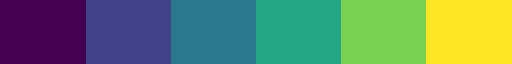

['#440154', '#414487', '#2a788e', '#22a884', '#7ad151', '#fde725']

In [186]:
# Define paleta de cores

# # alternativa A: definição manual das cores a partir de lista de cores em hex
coresViridis = ["#440154","#3b528b","#21918c","#5ec962","#fde725"]

# alternativa B: definição de cores utilizando palette do próprio matplotlib
# a paleta viridis é robusta para pessoas com daltonismo
vcmap = plt.get_cmap("viridis", 6) # um a mais do que o necessário para evitar utilizar o amarelo

# exibe o mapa de cores
display(vcmap)

# converte o mapa de cores em um vetor, para uso de cores individuais
coresViridis = [mpl.colors.rgb2hex(vcmap(i)) for i in range(6)] # extrai lista de cores em hex
display(coresViridis)

# define uma cor default
#corDefault = coresViridis[1]

# Carrega uma folha de estilos (opcional - questões estéticas)
plt.style.use("ggplot")

# Modifica mais alguns parâmetros gráficos (opcional - questões estéticas)
plt.rc("axes", facecolor="#fafafa", grid = True)
plt.rc("grid", color = "#f0f0f0")
plt.rc("axes", edgecolor="#cccccc", lw=0.1)

# plt.rcdefaults() # Restaura a configuração default

### 5.2 Margem Bruta

Métrica de análise para medir a porcentagem de lucro bruto que a companhia gera com cada serviço prestado ou produto vendido.

*Resultado Bruto / Receita de Vendas de Bens e/ou Serviços*



In [187]:
# Criar dataframe chamado margem bruta
margem_bruta = pd.DataFrame()
#Criar um loop calculando para cada empresa a margem bruta, concatenando todos no mesmo dataframe margem_bruta
for i in range(0,n_empresas):
  calculo_margem = pd.Series((df_dre.loc[lista_de_empresas[i],:].loc['Resultado Bruto'].iloc[-1,0])/(df_dre.loc[lista_de_empresas[i],:].loc['Receita de Venda de Bens e/ou Serviços'].iloc[-1,0]))
  margem_bruta = pd.concat([margem_bruta, calculo_margem], axis=1)
# Os nomes das empresas selecionadas como coluna do dataframe
margem_bruta.columns = lista_de_empresas
# Exibe o dataframe
margem_bruta

,3R PETROLEUM ÓLEO E GÁS S.A.,ENAUTA PARTICIPAÇÕES S.A.,PETRO RIO S.A.,PETRORECÔNCAVO S.A.
0,0.514902,0.493246,0.669001,0.484394


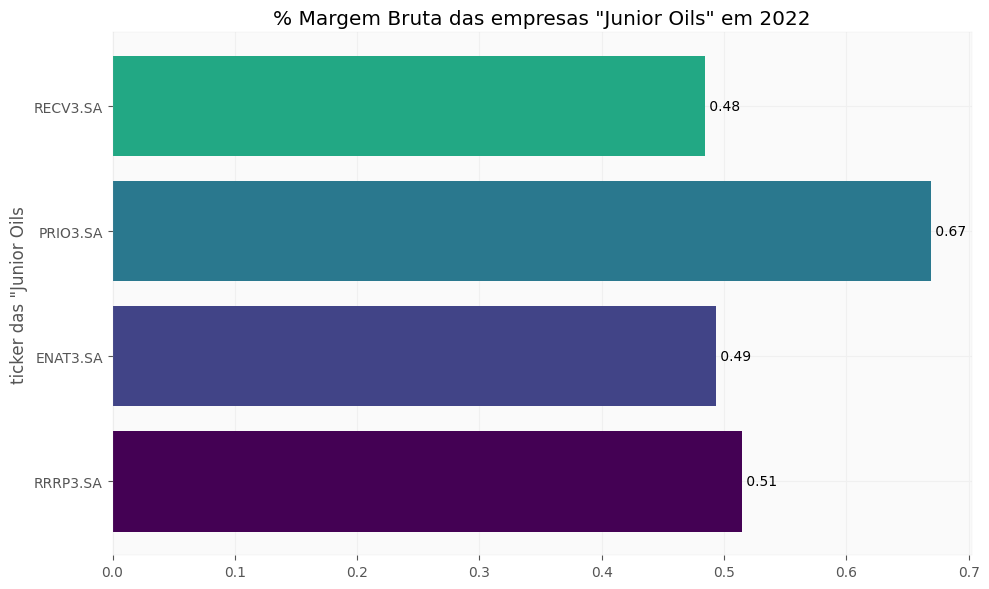

In [188]:
# Prepara a figura (fig) e a área do gráfico (ax) com largura 10 e altura 6 (em polegadas)
fig, ax = plt.subplots(figsize = (10, 6))

# Plota o gráfico de barras
b1 = ax.barh(y = tickers, width = margem_bruta.iloc[-1], color = coresViridis)

# Acrescenta os valores sobre as barras
for i, rect in enumerate(b1.patches):
    width = rect.get_width()
    ax.text(
        x = width,                             # posição x
        y = rect.get_y() + rect.get_height() / 2,   # posição y
        s = " {:.2f}".format(rect.get_width()),      # string com o valor
        ha = "left",                                # alinhamento na horizontal
        va = "center"                               # alinhamento na vertical
    )

# Acrescenta um título ao gráfico
plt.title('% Margem Bruta das empresas "Junior Oils" em 2022')

# Define os rótulos dos eixos
# plt.xlabel('país') # como já está no título, não é necessário
plt.ylabel('ticker das "Junior Oils') # é importante esclarecer a unidade e a ordem de grandeza


# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout() 


# Exibe o gráfico
plt.show()

Verifica-se que a Petro Rio tem a melhor margem bruta, enquanto a Petroconcavo tem a menor margem bruta, ou seja, tem custos elevados 

### 5.3 Margem Líquida

Métrica de análise para medir a porcentagem de lucro líquido alcançado pela organização em relação à sua receita.

*Lucro/Prejuízo Consolidado do Período / Receita de Vendas de Bens e/ou Serviços*

In [189]:
# Criar dataframe chamado margem_liquida
margem_liquida = pd.DataFrame()
#Criar um loop calculando para cada empresa a margem líquida, concatenando todos no mesmo dataframe margem_líquida
for i in range(0,n_empresas):
     calculo_margem_liq = pd.Series((df_dre.loc[lista_de_empresas[i],:].loc['Lucro/Prejuízo Consolidado do Período'].iloc[-1,0])/(df_dre.loc[lista_de_empresas[i],:].loc['Receita de Venda de Bens e/ou Serviços'].iloc[-1,0]))
     margem_liquida = pd.concat([margem_liquida, calculo_margem_liq], axis=1)
# Os nomes das empresas selecionadas como coluna do dataframe
margem_liquida.columns = lista_de_empresas
# Exibe o dataframe
margem_liquida

,3R PETROLEUM ÓLEO E GÁS S.A.,ENAUTA PARTICIPAÇÕES S.A.,PETRO RIO S.A.,PETRORECÔNCAVO S.A.
0,0.074149,0.176235,0.538554,0.387572


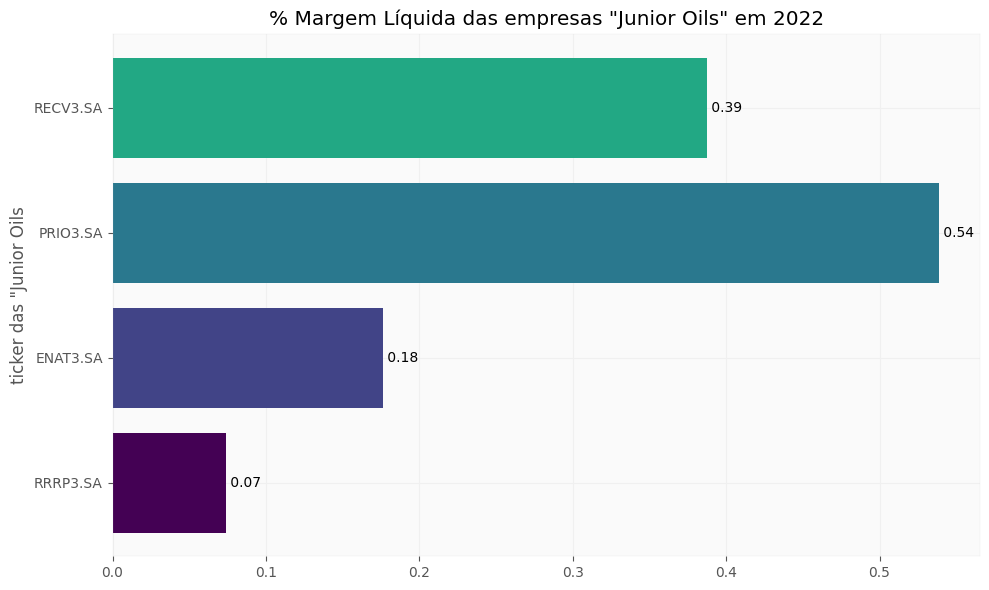

In [190]:
# Prepara a figura (fig) e a área do gráfico (ax) com largura 10 e altura 6 (em polegadas)
fig, ax = plt.subplots(figsize = (10, 6))

# Plota o gráfico de barras
b1 = ax.barh(y = tickers, width = margem_liquida.iloc[-1], color = coresViridis)

# Acrescenta os valores sobre as barras
for i, rect in enumerate(b1.patches):
    width = rect.get_width()
    ax.text(
        x = width,                             # posição x
        y = rect.get_y() + rect.get_height() / 2,   # posição y
        s = " {:.2f}".format(rect.get_width()),      # string com o valor
        ha = "left",                                # alinhamento na horizontal
        va = "center"                               # alinhamento na vertical
    )

# Acrescenta um título ao gráfico
plt.title('% Margem Líquida das empresas "Junior Oils" em 2022')

# Define os rótulos dos eixos
# plt.xlabel('país') # como já está no título, não é necessário
plt.ylabel('ticker das "Junior Oils') # é importante esclarecer a unidade e a ordem de grandeza


# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout()

A Petro Rio tem a maior margem líquida entres as 4 "*Junior Oil*", consequencia de ter uma margem bruta a maior, porém diferente da PetroReconcavo que tinha a menor margem bruta, demonstra uma boa gestão operacional tendo a segunda maior margem líquida. Todavia a 3R Petroleum que tem a segunda melhor margem bruta, entretanto, tem a pior margem líquida, ou seja, sua gestão operacional impacta negativamente para o resultado da empresa. A Enauta segue a mesma situação da 3R 

### 5.4 EBIT (Earn Before Interest and Taxes)

 É um indicador não-contábil que demonstra o lucro de uma empresa antes do reconhecimento das despesas com juros e impostos, também chamado de LAJIR, ou seja, Lucro operacional.

 

In [191]:
# Criar dataframe chamado ebit_ajustado
ebit_ajustado = pd.DataFrame()
#Criar um loop calculando para cada empresa o ebit, concatenando todos no mesmo dataframe ebit_ajustado
for i in range(0, n_empresas):
  ebit_ajustado_ = pd.Series(df_dre.loc[lista_de_empresas[i],:].loc['Receita de Venda de Bens e/ou Serviços'].iloc[-1,0]+
                             df_dre.loc[lista_de_empresas[i],:].loc['Custo dos Bens e/ou Serviços Vendidos'].iloc[-1,0]+
                             df_dre.loc[lista_de_empresas[i],:].loc['Despesas com Vendas'].iloc[-1,0]+
                             df_dre.loc[lista_de_empresas[i],:].loc['Despesas Gerais e Administrativas'].iloc[-1,0])
  ebit_ajustado = pd.concat([ebit_ajustado, ebit_ajustado_], axis=1)
# Os nomes das empresas selecionadas como coluna do dataframe
ebit_ajustado.columns=lista_de_empresas
# Exibe o dataframe
ebit_ajustado

,3R PETROLEUM ÓLEO E GÁS S.A.,ENAUTA PARTICIPAÇÕES S.A.,PETRO RIO S.A.,PETRORECÔNCAVO S.A.
0,547875.0,893766.0,4210446.0,1331150.0


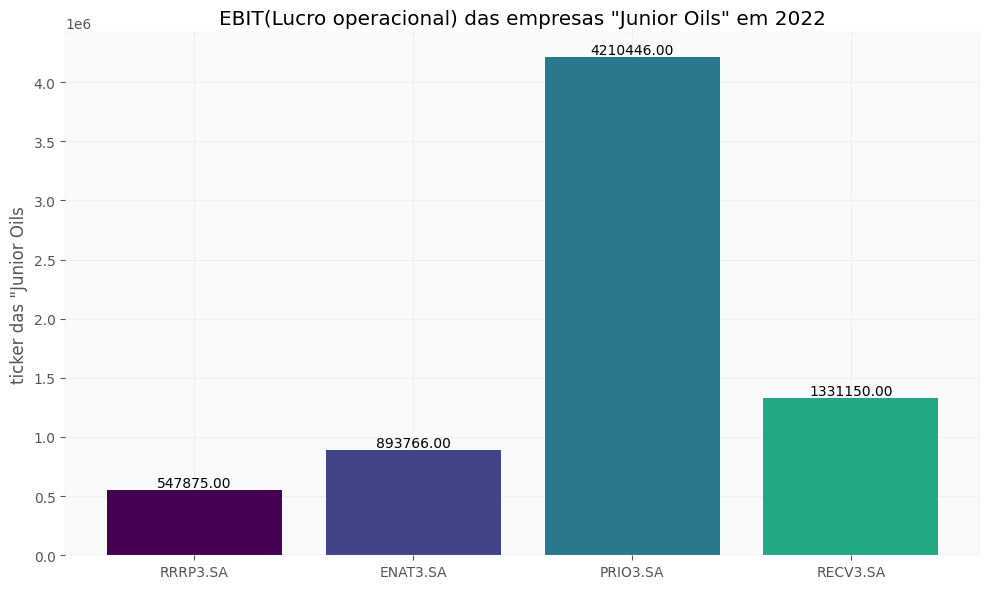

In [192]:
# Prepara a figura (fig) e a área do gráfico (ax) com largura 10 e altura 6 (em polegadas)
fig, ax = plt.subplots(figsize = (10, 6))

# Plota o gráfico de barras
b1 = ax.bar(x = tickers, height = ebit_ajustado.iloc[-1], color = coresViridis)

# Acrescenta os valores sobre as barras
for i, rect in enumerate(b1.patches):
    height = rect.get_height()
    ax.text(
        x = rect.get_x() + rect.get_width() / 2,     # posição x
        y = height + 5,                             # posição y
        s = "{:.2f}".format(height),                 # string com o valor
        ha = "center",                               # alinhamento na horizontal
        va = "bottom"                                # alinhamento na vertical
    )

# Acrescenta um título ao gráfico
plt.title('EBIT(Lucro operacional) das empresas "Junior Oils" em 2022')

# Define os rótulos dos eixos
# plt.xlabel('país') # como já está no título, não é necessário
plt.ylabel('ticker das "Junior Oils') # é importante esclarecer a unidade e a ordem de grandeza

# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout() 

# Exibe o gráfico
plt.show()

O Ebit demonstra o resultado das operações realizadas pela atividade-fim do négocio, reflitindo a mesma visulização da margem líquida 

### 5.5 Margem EBIT

 É um indicador que possibilita compreender e avaliar a eficiência operacional de uma empresa. Dessa forma, esse índice é utilizado para realizar comparativos da lucratividade operacionais de companhias de setores análogos

EBIT/Receita Total

In [193]:
# Criar dataframe chamado margem_ebit
margem_ebit = pd.DataFrame()
#Criar um loop calculando para cada empresa a margem ebit, concatenando todos no mesmo dataframe margem_ebit
for i in range(0, n_empresas):
  margem_ebit_ = pd.Series((df_dre.loc[lista_de_empresas[i],:].loc['Receita de Venda de Bens e/ou Serviços'].iloc[-1,0]+
                             df_dre.loc[lista_de_empresas[i],:].loc['Custo dos Bens e/ou Serviços Vendidos'].iloc[-1,0]+
                             df_dre.loc[lista_de_empresas[i],:].loc['Despesas com Vendas'].iloc[-1,0]+
                             df_dre.loc[lista_de_empresas[i],:].loc['Despesas Gerais e Administrativas'].iloc[-1,0]))/(df_dre.loc[lista_de_empresas[i],:].loc['Receita de Venda de Bens e/ou Serviços'].iloc[-1,0])
  margem_ebit = pd.concat([margem_ebit, margem_ebit_], axis=1)
# Os nomes das empresas selecionadas como coluna do dataframe
margem_ebit.columns = lista_de_empresas
# Exibe o dataframe
margem_ebit

,3R PETROLEUM ÓLEO E GÁS S.A.,ENAUTA PARTICIPAÇÕES S.A.,PETRO RIO S.A.,PETRORECÔNCAVO S.A.
0,0.318084,0.410858,0.661658,0.447304


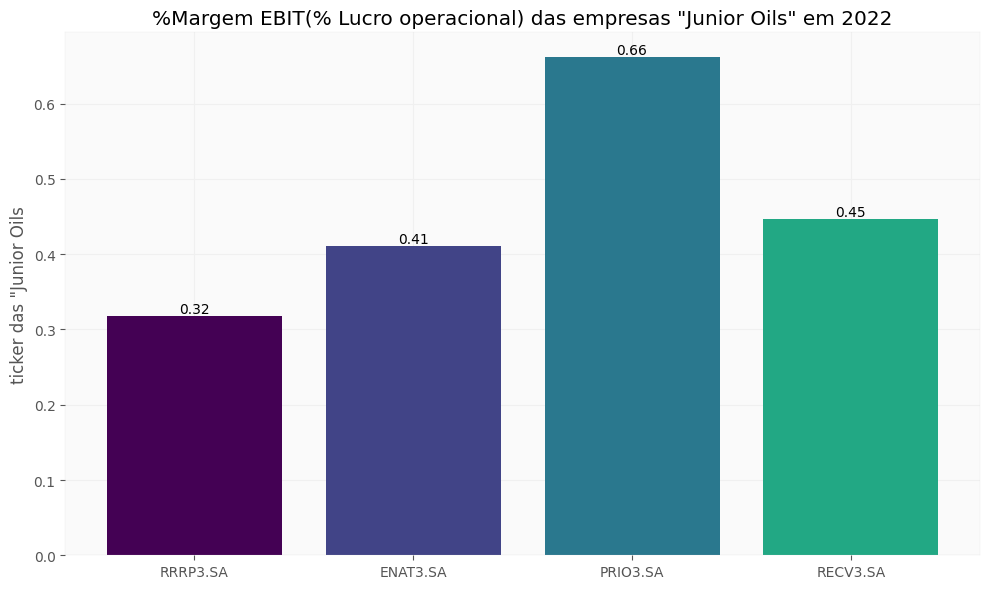

In [194]:
# Prepara a figura (fig) e a área do gráfico (ax) com largura 10 e altura 6 (em polegadas)
fig, ax = plt.subplots(figsize = (10, 6))

# Plota o gráfico de barras
b1 = ax.bar(x = tickers, height = margem_ebit.iloc[-1], color = coresViridis)

# Acrescenta os valores sobre as barras
ax.bar_label(ax.containers[0], fmt="%.2f") # formatação do número com uma casa decimal


# Acrescenta um título ao gráfico
plt.title('%Margem EBIT(% Lucro operacional) das empresas "Junior Oils" em 2022')

# Define os rótulos dos eixos
# plt.xlabel('país') # como já está no título, não é necessário
plt.ylabel('ticker das "Junior Oils') # é importante esclarecer a unidade e a ordem de grandeza

# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout() 

# Exibe o gráfico
plt.show()

A Petro Rio tem a maior capacidade de gerar lucro as 4 "*Junior Oil*",  Ao contrário da 3R Petroleum que tem a menor capacidade de gerar lucro. 

### 5.6 Liquidez

Índice para mostrar a capacidade financeira de uma empresa


#### 5.6.1 Disponibilidades

Representa o saldo de caixa livre de uma empresa,

In [195]:
# Criar dataframe chamado caixa_ajustado
caixa_ajustado = pd.DataFrame()
#Criar um loop calculando para cada empresa a disponibilidade, concatenando todos no mesmo dataframe caixa_ajustado
for i in range(0, n_empresas):
  caixa_aj = pd.Series(df_bpa.loc[lista_de_empresas[i],:].loc['Caixa e Equivalentes de Caixa'].iloc[-1,0]+df_bpa.loc[lista_de_empresas[i],:].loc['Aplicações Financeiras'].iloc[-1,0])
  caixa_ajustado = pd.concat([caixa_ajustado, caixa_aj], axis=1)
# Os nomes das empresas selecionadas como coluna do dataframe
caixa_ajustado.columns=lista_de_empresas
# Exibe o dataframe
caixa_ajustado

,3R PETROLEUM ÓLEO E GÁS S.A.,ENAUTA PARTICIPAÇÕES S.A.,PETRO RIO S.A.,PETRORECÔNCAVO S.A.
0,831795.0,2431794.0,9612961.0,1611191.0


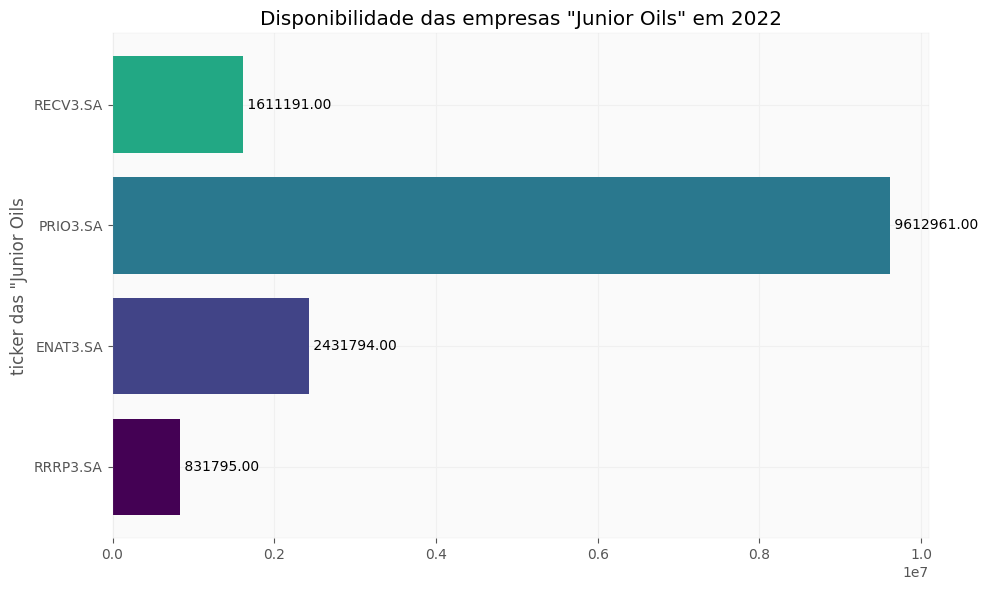

In [196]:
# Prepara a figura (fig) e a área do gráfico (ax) com largura 10 e altura 6 (em polegadas)
fig, ax = plt.subplots(figsize = (10, 6))

# Plota o gráfico de barras
b1 = ax.barh(y = tickers, width = caixa_ajustado.iloc[-1], color = coresViridis)

# Acrescenta os valores sobre as barras
for i, rect in enumerate(b1.patches):
    width = rect.get_width()
    ax.text(
        x = width,                             # posição x
        y = rect.get_y() + rect.get_height() / 2,   # posição y
        s = " {:.2f}".format(rect.get_width()),      # string com o valor
        ha = "left",                                # alinhamento na horizontal
        va = "center"                               # alinhamento na vertical
    )

# Acrescenta um título ao gráfico
plt.title('Disponibilidade das empresas "Junior Oils" em 2022')

# Define os rótulos dos eixos
# plt.xlabel('país') # como já está no título, não é necessário
plt.ylabel('ticker das "Junior Oils') # é importante esclarecer a unidade e a ordem de grandeza


# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout() 

Podemos observar que a disponibilidade da Petro Rio reflete uma boa saúde financeira, enquanto a 3R Petroleum tem uma disponibilidade positiva menor entre as empresas.

#### 5.6.2 Liquidez Corrente (Ativo Circulante / Passivo Circulante)

Indica a capacidade da companhia em honrar suas obrigações no curto prazo.

In [197]:
# Criar dataframe chamado liquidez_corrente
liquidez_corrente = pd.DataFrame()
#Criar um loop calculando para cada empresa a liquidez corrente, concatenando todos no mesmo dataframe liquidez_corrente
for i in range(0, n_empresas):
 liq_corrente = pd.Series((df_bpa.loc[lista_de_empresas[i],:].loc['Ativo Circulante'].iloc[-1,0])/(df_bpp.loc[lista_de_empresas[i],:].loc['Passivo Circulante'].iloc[-1,0]))
 liquidez_corrente = pd.concat([liquidez_corrente, liq_corrente], axis=1)
# Os nomes das empresas selecionadas como coluna do dataframe
liquidez_corrente.columns = lista_de_empresas
# Exibe o dataframe
liquidez_corrente

,3R PETROLEUM ÓLEO E GÁS S.A.,ENAUTA PARTICIPAÇÕES S.A.,PETRO RIO S.A.,PETRORECÔNCAVO S.A.
0,1.761892,1.721665,7.640217,1.53274


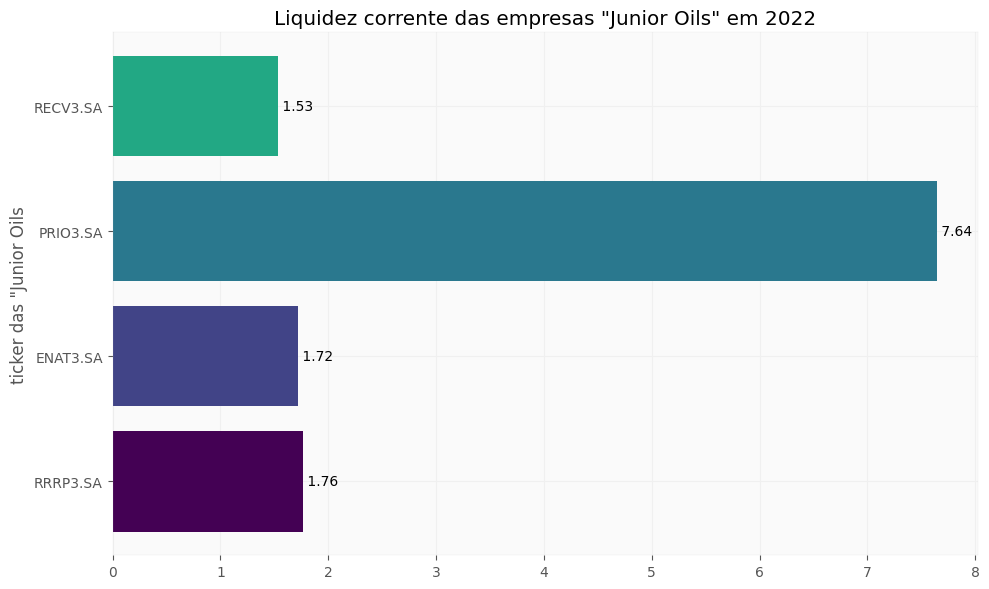

In [198]:
# Prepara a figura (fig) e a área do gráfico (ax) com largura 10 e altura 6 (em polegadas)
fig, ax = plt.subplots(figsize = (10, 6))

# Plota o gráfico de barras
b1 = ax.barh(y = tickers, width = liquidez_corrente.iloc[-1], color = coresViridis)

# Acrescenta os valores sobre as barras
for i, rect in enumerate(b1.patches):
    width = rect.get_width()
    ax.text(
        x = width,                             # posição x
        y = rect.get_y() + rect.get_height() / 2,   # posição y
        s = " {:.2f}".format(rect.get_width()),      # string com o valor
        ha = "left",                                # alinhamento na horizontal
        va = "center"                               # alinhamento na vertical
    )

# Acrescenta um título ao gráfico
plt.title('Liquidez corrente das empresas "Junior Oils" em 2022')

# Define os rótulos dos eixos
# plt.xlabel('país') # como já está no título, não é necessário
plt.ylabel('ticker das "Junior Oils') # é importante esclarecer a unidade e a ordem de grandeza


# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout() 

A liquidez corrente das empresas demonstram boas capacidades de arcar com suas obrigações e dívidas de curta prazo, ou seja, todas empresas tem um boa saúde financeira e em destaque a Petro Rio que além da ótima saude financeira, reflete capacidade de fazer maiores investimentos que em conjuntos com outras informações pode confirmar as analises.

### 5.7 Dívida Bruta/Patrimônio líquido

O indicador de dívida bruta/patrimônio líquido avalia o total de dívidas que o negócio possui sobre o valor real que a empresa tem.

Dívida Bruta = dívidas de curto prazo + dívidas de longo prazo e o Patrimônio líquido = ativos – passivos



In [199]:
# Criar dataframe chamado divida_bruta
divida_bruta = pd.DataFrame()
#Criar um loop calculando para cada empresa a dívida bruta, concatenando todos no mesmo dataframe divida_bruta
for i in range(0, n_empresas):
  dbpl = pd.Series((df_bpp.loc[lista_de_empresas[i], :].loc['Empréstimos e Financiamentos'].iloc[-2,0] +
                    df_bpp.loc[lista_de_empresas[i], :].loc['Empréstimos e Financiamentos'].iloc[0,0]))
  divida_bruta = pd.concat([divida_bruta, dbpl], axis=1)
# Os nomes das empresas selecionadas como coluna do dataframe
divida_bruta.columns = lista_de_empresas

# Criar dataframe chamado pl_ajustado
pl_ajustado = pd.DataFrame()
#Criar um loop calculando para cada empresa a patrimômnio líquido ajustado, concatenando todos no mesmo dataframe pl_ajustado
for i in range(0, n_empresas):
  pl_ajd = pd.Series(df_bpp.loc[lista_de_empresas[i],:].loc['Patrimônio Líquido Consolidado'].iloc[-1,-1] - df_bpp.loc[lista_de_empresas[i],:].loc['Participação dos Acionistas Não Controladores'].iloc[-1,-1])
  pl_ajustado = pd.concat([pl_ajustado, pl_ajd], axis=1)
# Os nomes das empresas selecionadas como coluna do dataframe
pl_ajustado.columns = lista_de_empresas

#Criar um dataframe com o cálculo da dívida bruta sobre o patrimônio líquido
divida_bruta_pl_df = divida_bruta/pl_ajustado
# Exibe o dataframe
divida_bruta_pl_df

,3R PETROLEUM ÓLEO E GÁS S.A.,ENAUTA PARTICIPAÇÕES S.A.,PETRO RIO S.A.,PETRORECÔNCAVO S.A.
0,0.245664,0.536172,0.932343,0.172046


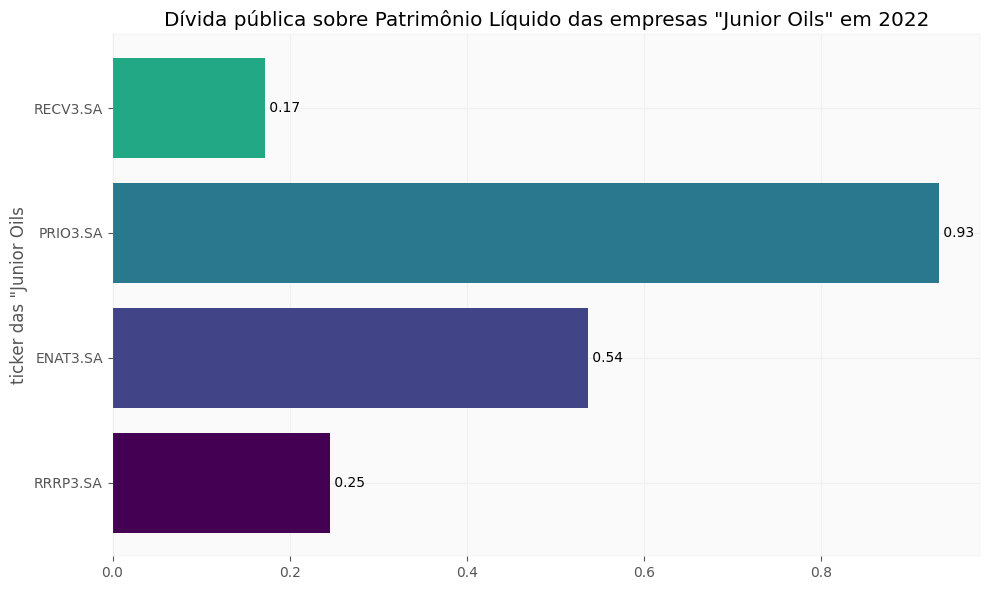

In [200]:
# Prepara a figura (fig) e a área do gráfico (ax) com largura 10 e altura 6 (em polegadas)
fig, ax = plt.subplots(figsize = (10, 6))

# Plota o gráfico de barras
b1 = ax.barh(y = tickers, width = divida_bruta_pl_df.iloc[-1], color = coresViridis)

# Acrescenta os valores sobre as barras
for i, rect in enumerate(b1.patches):
    width = rect.get_width()
    ax.text(
        x = width,                             # posição x
        y = rect.get_y() + rect.get_height() / 2,   # posição y
        s = " {:.2f}".format(rect.get_width()),      # string com o valor
        ha = "left",                                # alinhamento na horizontal
        va = "center"                               # alinhamento na vertical
    )

# Acrescenta um título ao gráfico
plt.title('Dívida pública sobre Patrimônio Líquido das empresas "Junior Oils" em 2022')

# Define os rótulos dos eixos
# plt.xlabel('país') # como já está no título, não é necessário
plt.ylabel('ticker das "Junior Oils') # é importante esclarecer a unidade e a ordem de grandeza


# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout() 

Este indicador tem grande importância quanto a alavancagem financeira, pois quanto maior, demostra a possíbilidade do patrimônio líquido este compromentido com dívidas. Podemos verificar que a 3R Petroleum e a Petroreconcavo demonstram que suas dívidas estão bem equilibradas, não compromentendo seus negócios. Entrentanto, a Petro Rio, tem suas dívidas bastante comprometida, tendo um alta alavancagem financeira, porém como vimos a sua liquidez corrente, podem verificar que possívelmente apesar do indicador mostrar um alerta que sua dívida compromente o seu patrimônio, há uma grande disponibilidades que tem capacidade de reduzir essas dívida, porém pode ser estratégico para o crescimento da empresa.

### 5.8 Dívida Liquida/Ebit

Analisar o índice de endividamento de uma empresa. Seu resultado demonstra o número de anos que uma empresa levaria para pagar sua dívida líquida no cenário em que o EBIT permanece constante.

Dívida Líquida = Dívida Bruta - caixa e equivalentes de caixa da empresa


In [201]:
# Criar dataframe chamado divida_liquida_ebit
divida_liquida_ebit = pd.DataFrame()
#Criar um loop calculando para cada empresa a dívida liquida, concatenando todos no mesmo dataframe divida_liquda_ebit
for i in range(0, n_empresas):
  dbpl = pd.Series((df_bpp.loc[lista_de_empresas[i], :].loc['Empréstimos e Financiamentos'].iloc[-2,0] +
                    df_bpp.loc[lista_de_empresas[i], :].loc['Empréstimos e Financiamentos'].iloc[0,0])-df_bpa.loc[lista_de_empresas[i],:].loc['Caixa e Equivalentes de Caixa'].iloc[-1,0])
  divida_liquida_ebit = pd.concat([divida_liquida_ebit, dbpl], axis=1)
# Os nomes das empresas selecionadas como coluna do dataframe
divida_liquida_ebit.columns = lista_de_empresas
#Criar um dataframe com o cálculo da dívida líquida sobre o ebit
divida_liquida_ebit = divida_liquida_ebit/ebit_ajustado
#Exibe o dataframe
divida_liquida_ebit

,3R PETROLEUM ÓLEO E GÁS S.A.,ENAUTA PARTICIPAÇÕES S.A.,PETRO RIO S.A.,PETRORECÔNCAVO S.A.
0,0.459229,1.51005,-0.092675,0.221277


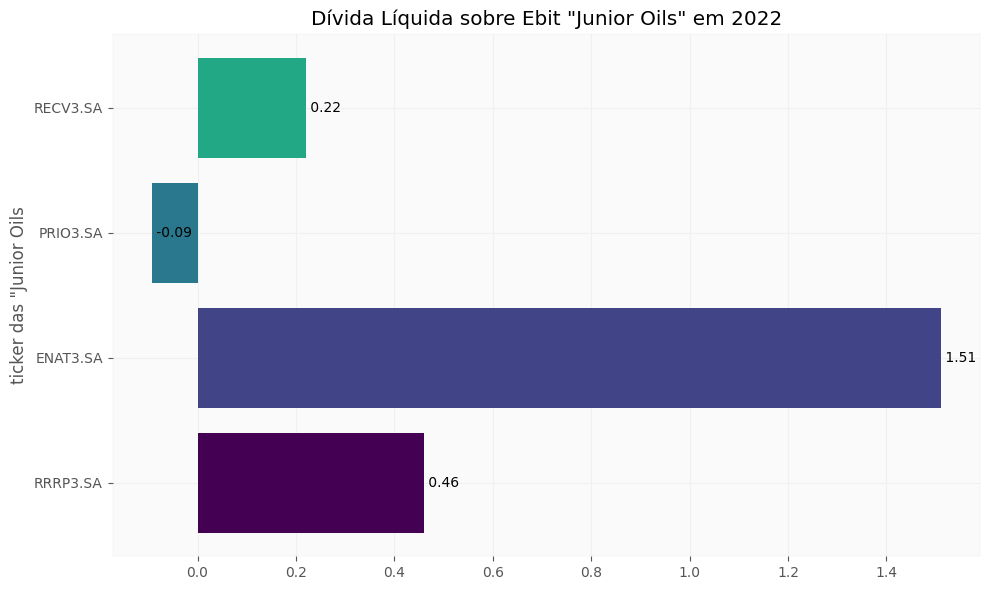

In [202]:
# Prepara a figura (fig) e a área do gráfico (ax) com largura 10 e altura 6 (em polegadas)
fig, ax = plt.subplots(figsize = (10, 6))

# Plota o gráfico de barras
b1 = ax.barh(y = tickers, width = divida_liquida_ebit.iloc[-1], color = coresViridis)

# Acrescenta os valores sobre as barras
for i, rect in enumerate(b1.patches):
    width = rect.get_width()
    ax.text(
        x = width,                             # posição x
        y = rect.get_y() + rect.get_height() / 2,   # posição y
        s = " {:.2f}".format(rect.get_width()),      # string com o valor
        ha = "left",                                # alinhamento na horizontal
        va = "center"                               # alinhamento na vertical
    )

# Acrescenta um título ao gráfico
plt.title('Dívida Líquida sobre Ebit "Junior Oils" em 2022')

# Define os rótulos dos eixos
# plt.xlabel('país') # como já está no título, não é necessário
plt.ylabel('ticker das "Junior Oils') # é importante esclarecer a unidade e a ordem de grandeza


# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout() 

Neste indicador expressa que a Enauta levaria um ano e meio para quitar suas dívidas que não é um mal indicador, enquanto que Petro Rio teve o indicador negativo, isso ocorre porque há mais disponibilidade que dívida, visto na liquidez corrente, logo todas as empresas tem um bom indicador

### 5.9 Ebit/Ativo

é a capacidade que uma empresa apresenta de gerar lucro com base nas dimensões do seu patrimônio. Quanto maior for a relação EBIT/Ativo, maior é a geração de lucro por parte da empresa e consequentemente melhores os seus resultados para o investidor.


In [203]:
# Criar dataframe chamado Ebit_Ativo
Ebit_Ativo = pd.DataFrame()
#Criar um loop calculando para cada empresa o ebit sobre o ativo, concatenando todos no mesmo dataframe Ebit_Ativo
for i in range(0,n_empresas):
  ativo_ = pd.Series(df_bpa.loc[lista_de_empresas[i],:].loc['Ativo Total'].iloc[-1,0])
  Ebit_Ativo = pd.concat([Ebit_Ativo, ativo_], axis=1)
# Os nomes das empresas selecionadas como coluna do dataframe
Ebit_Ativo.columns = lista_de_empresas
#Criar um dataframe com o cálculo do ebit sobre o ativo
Ebit_Ativo = ebit_ajustado/Ebit_Ativo
#Exibe o dataframe
Ebit_Ativo

,3R PETROLEUM ÓLEO E GÁS S.A.,ENAUTA PARTICIPAÇÕES S.A.,PETRO RIO S.A.,PETRORECÔNCAVO S.A.
0,0.068732,0.107994,0.207385,0.202146


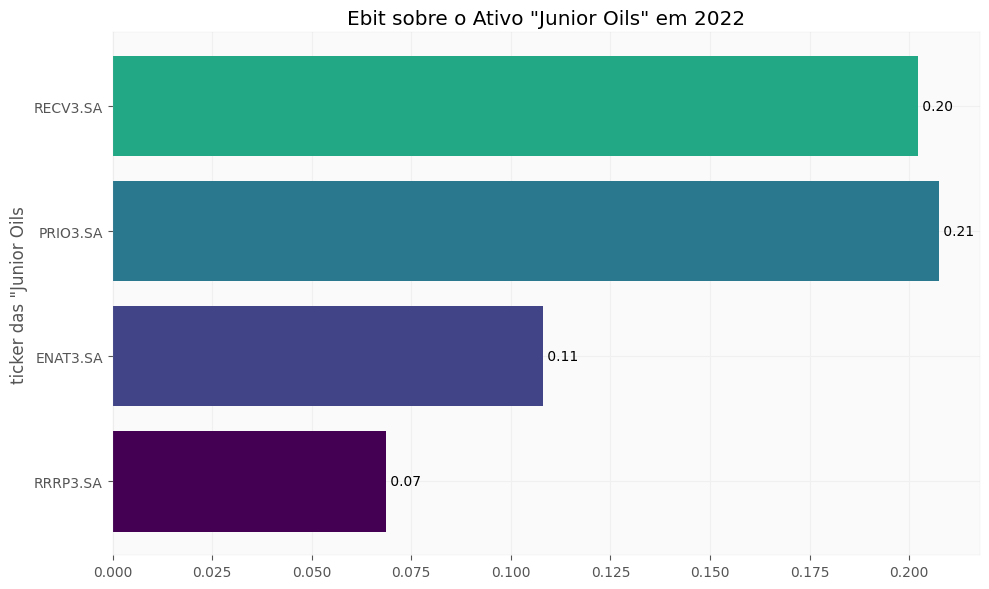

In [204]:
# Prepara a figura (fig) e a área do gráfico (ax) com largura 10 e altura 6 (em polegadas)
fig, ax = plt.subplots(figsize = (10, 6))

# Plota o gráfico de barras
b1 = ax.barh(y = tickers, width = Ebit_Ativo.iloc[-1], color = coresViridis)

# Acrescenta os valores sobre as barras
for i, rect in enumerate(b1.patches):
    width = rect.get_width()
    ax.text(
        x = width,                             # posição x
        y = rect.get_y() + rect.get_height() / 2,   # posição y
        s = " {:.2f}".format(rect.get_width()),      # string com o valor
        ha = "left",                                # alinhamento na horizontal
        va = "center"                               # alinhamento na vertical
    )

# Acrescenta um título ao gráfico
plt.title('Ebit sobre o Ativo "Junior Oils" em 2022')

# Define os rótulos dos eixos
# plt.xlabel('país') # como já está no título, não é necessário
plt.ylabel('ticker das "Junior Oils') # é importante esclarecer a unidade e a ordem de grandeza


# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout() 

Este indicador demonstra que tanto a Petro Rio como Petrorecôncavo tem boa capacidade de gerar lucro e melhores resultado para o investidor, apesar da 3R Petroleum ter o menor indicador, apresenta capacidade de gerar lucro também. 

### 5.10 ROIC - Return Over Invested Capital

É um indicador que avalia a rentabilidade do investimento aplicado pelos acionistas e credores na empresa.

In [205]:
#Criar um dataframe ROIC com o cálculo do ebit sobre a dívida bruta
ROIC = ebit_ajustado/divida_bruta
#Exibe o dataframe
ROIC

,3R PETROLEUM ÓLEO E GÁS S.A.,ENAUTA PARTICIPAÇÕES S.A.,PETRO RIO S.A.,PETRORECÔNCAVO S.A.
0,0.520773,0.405599,0.456528,2.030489


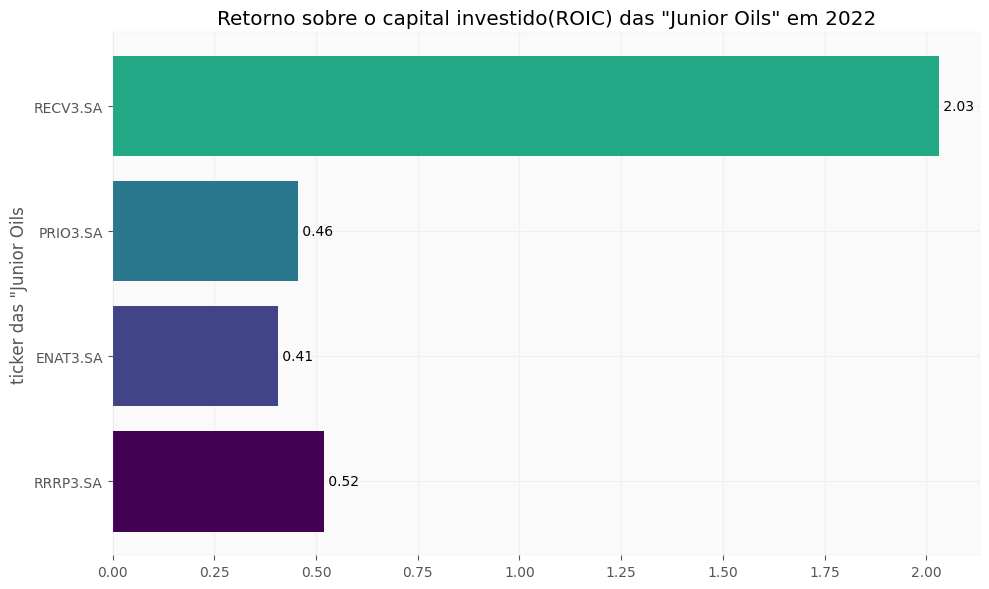

In [206]:
# Prepara a figura (fig) e a área do gráfico (ax) com largura 10 e altura 6 (em polegadas)
fig, ax = plt.subplots(figsize = (10, 6))

# Plota o gráfico de barras
b1 = ax.barh(y = tickers, width = ROIC.iloc[-1], color = coresViridis)

# Acrescenta os valores sobre as barras
for i, rect in enumerate(b1.patches):
    width = rect.get_width()
    ax.text(
        x = width,                             # posição x
        y = rect.get_y() + rect.get_height() / 2,   # posição y
        s = " {:.2f}".format(rect.get_width()),      # string com o valor
        ha = "left",                                # alinhamento na horizontal
        va = "center"                               # alinhamento na vertical
    )

# Acrescenta um título ao gráfico
plt.title('Retorno sobre o capital investido(ROIC) das "Junior Oils" em 2022')

# Define os rótulos dos eixos
# plt.xlabel('país') # como já está no título, não é necessário
plt.ylabel('ticker das "Junior Oils') # é importante esclarecer a unidade e a ordem de grandeza


# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout() 

O ROIC demonstra a rentabilidade em relação ao valor investido, e neste ponto entre as empresas a Petrorecôncavo se destaca, enquanto as outras apresenta indicadores próximo entre elas.

### 5.11 ROE - Return on Equity

É um indicador que avalia em lucro líquido gerado em relação ao patrimônio líquido.

ROE = lucro líquido/Patrimônio Líquido

In [207]:
# Criar dataframe chamado ROE
roe = pd.DataFrame()
#Criar um loop calculando para cada empresa o ROE, concatenando todos no mesmo dataframe roe
for i in range(0,n_empresas):
     calculo_roe_ = pd.Series((df_dre.loc[lista_de_empresas[i],:].loc['Lucro/Prejuízo Consolidado do Período'].iloc[-1,0])/(df_bpp.loc[lista_de_empresas[i],:].loc['Patrimônio Líquido Consolidado'].iloc[-1,-1] - df_bpp.loc[lista_de_empresas[i],:].loc['Participação dos Acionistas Não Controladores'].iloc[-1,-1]))
     roe = pd.concat([roe, calculo_roe_], axis=1)
# Os nomes das empresas selecionadas como coluna do dataframe
roe.columns = lista_de_empresas
#Exibe o dataframe
roe

,3R PETROLEUM ÓLEO E GÁS S.A.,ENAUTA PARTICIPAÇÕES S.A.,PETRO RIO S.A.,PETRORECÔNCAVO S.A.
0,0.029823,0.093283,0.346448,0.302687


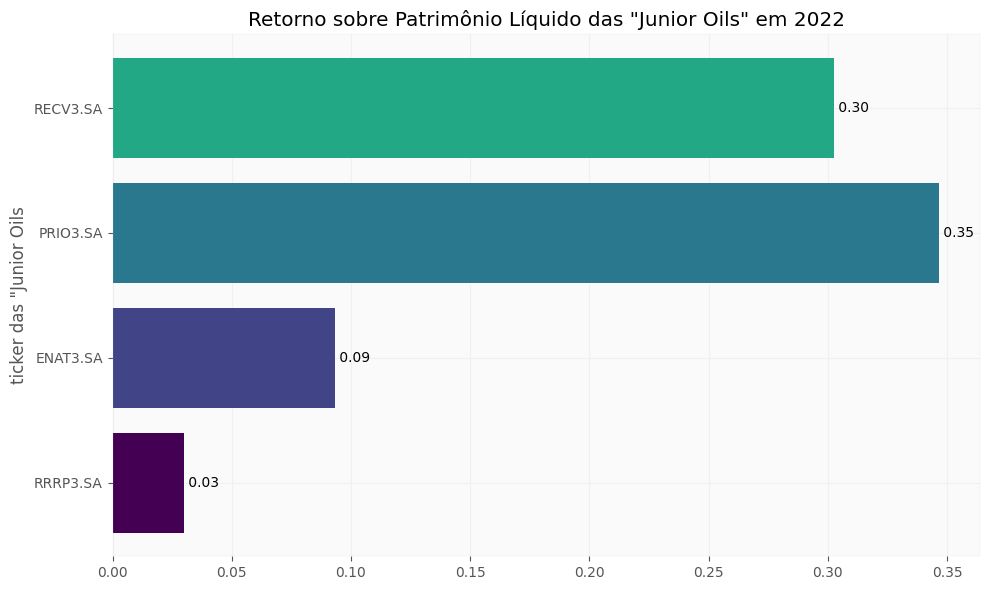

In [208]:
# Prepara a figura (fig) e a área do gráfico (ax) com largura 10 e altura 6 (em polegadas)
fig, ax = plt.subplots(figsize = (10, 6))

# Plota o gráfico de barras
b1 = ax.barh(y = tickers, width = roe.iloc[-1], color = coresViridis)

# Acrescenta os valores sobre as barras
for i, rect in enumerate(b1.patches):
    width = rect.get_width()
    ax.text(
        x = width,                             # posição x
        y = rect.get_y() + rect.get_height() / 2,   # posição y
        s = " {:.2f}".format(rect.get_width()),      # string com o valor
        ha = "left",                                # alinhamento na horizontal
        va = "center"                               # alinhamento na vertical
    )

# Acrescenta um título ao gráfico
plt.title('Retorno sobre Patrimônio Líquido das "Junior Oils" em 2022')

# Define os rótulos dos eixos
# plt.xlabel('país') # como já está no título, não é necessário
plt.ylabel('ticker das "Junior Oils') # é importante esclarecer a unidade e a ordem de grandeza


# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout() 

O ROE indica quanto maior, mais eficiente é a empresa para geração de lucro, logo a Petro Rio e Petrorecôncavo apresenta grandes potenciais de geração de bons retornos ao investidor

### 5.12 Equity e Preço

É o valor pertencente aos proprietários e acionistas dessa determinada empresa. Ou seja, é a soma do valor real de cada ação.


In [209]:
# Criar um DataFrame vazio para armazenar as informações de todos os tickers
cotacao = pd.DataFrame()
# Iterar sobre a lista de tickers
for ticker in tickers:
    # Obter os preços históricos da ação no período desejado
    data = si.get_data(ticker, start_date='2022-01-01', end_date='2022-12-31')
    # Selecionar somente a coluna de preços de fechamento (Close)
    close_prices = data['close']
    # Adicionar as informações do ticker ao DataFrame criado anteriormente
    cotacao[ticker] = close_prices
# Os nomes das empresas selecionadas como coluna do dataframe    
cotacao.columns = lista_de_empresas
# Exibir o DataFrame com as informações de todos os tickers
cotacao

,3R PETROLEUM ÓLEO E GÁS S.A.,ENAUTA PARTICIPAÇÕES S.A.,PETRO RIO S.A.,PETRORECÔNCAVO S.A.
2022-01-03,34.150002,13.35,20.290001,17.570000
2022-01-04,34.480000,13.70,20.719999,17.830000
2022-01-05,32.009998,12.80,18.490000,16.400000
2022-01-06,31.809999,12.09,18.959999,16.360001
2022-01-07,34.000000,12.82,19.820000,17.219999
...,...,...,...,...
2022-12-23,35.860001,12.91,35.490002,30.330000
2022-12-26,36.110001,13.23,35.439999,30.730000
2022-12-27,36.000000,13.10,35.580002,30.950001
2022-12-28,37.029999,13.31,37.250000,33.049999


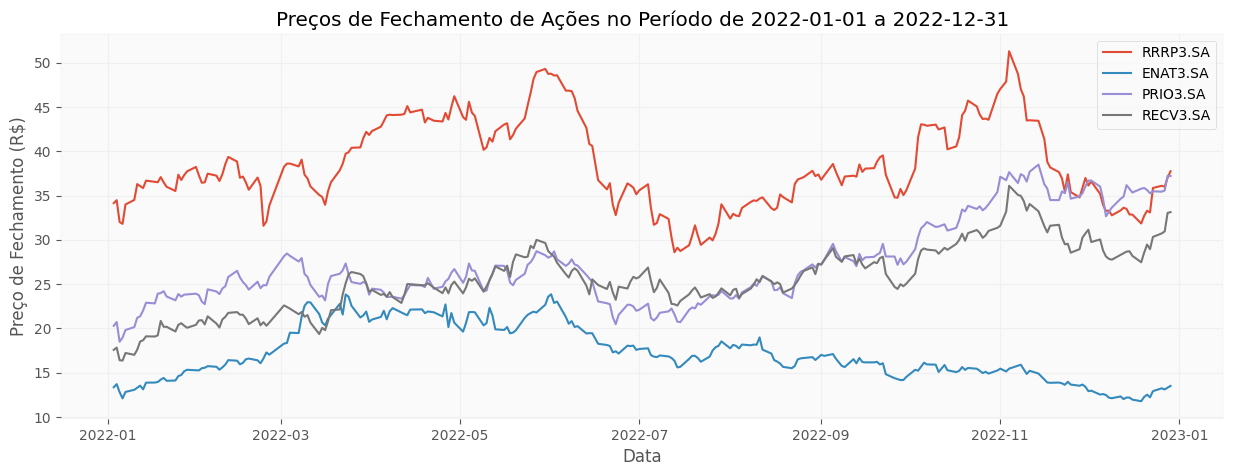

In [210]:
# Criar dataframe chamado cotacao
cotacao = pd.DataFrame()
# Iterar sobre a lista de tickers
for ticker in tickers:
    # Obter os preços históricos da ação no período desejado
    data = si.get_data(ticker, start_date='2022-01-01', end_date='2022-12-31')
    # Selecionar somente a coluna de preços de fechamento (Close)
    close_prices = data['close']
    # Adicionar as informações do ticker ao DataFrame criado anteriormente
    cotacao[ticker] = close_prices
# Prepara a figura (fig) e a área do gráfico (ax) com largura 15 e altura 5
fig, ax = plt.subplots(figsize=(15, 5))
# Plota o gráfico de linha para cada ticker
for ticker in tickers:
    ax.plot(cotacao.index, cotacao[ticker], label=ticker)
# Acrescenta um título ao gráfico
ax.set_title('Preços de Fechamento de Ações no Período de 2022-01-01 a 2022-12-31')
# Define os rótulos dos eixos
ax.set_xlabel('Data')
ax.set_ylabel('Preço de Fechamento (R$)')
# Acrescenta a legenda ao gráfico
ax.legend()
# Exibe o gráfico
plt.show()

Podemos observar que em 2022 a Petro Rio e Petrorecôncavo apresenta crescimento de suas ações no mercado, diferente da Enauta que houve queda do preço e a 3R Petroleum bem volátil.

In [212]:
# Criar dataframe numero de ações
n_acoes = pd.DataFrame()
#Criar um loop calculando para cada empresa o número de ações, concatenando todos no mesmo dataframe n_acoes
for i in tickers:
    dc = pdr.get_quote_yahoo(i)
    df_ = dc.loc[i]["sharesOutstanding"]
    df_novo = pd.DataFrame(pd.Series(df_))
    n_acoes = pd.concat([n_acoes, df_novo], axis=1)
# Os nomes das empresas selecionadas como coluna do dataframe   
n_acoes.columns = lista_de_empresas
# dividir numero de ações por 1000
n_acoes = n_acoes/1000
#Exibe o dataframe
n_acoes

RemoteDataError: ignored

### 5.13 Valor de Mercado (Marketcap)

É o quanto uma empresa ou produto está valendo para o mercado, conforme a lei de oferta e demanda.

In [ ]:
# Criar um DataFrame vazio para armazenar as informações de todos os tickers
cotacao = pd.DataFrame()

# Iterar sobre a lista de tickers
for ticker in tickers:
    # Obter os preços históricos da ação no período desejado
    data = si.get_data(ticker, start_date='2022-01-01', end_date='2022-12-31')
    # Selecionar somente a coluna de preços de fechamento (Close)
    close_prices = data['close']
    # Adicionar as informações do ticker ao DataFrame criado anteriormente
    cotacao[ticker] = close_prices
# Os nomes das empresas selecionadas como coluna do dataframe    
cotacao.columns = lista_de_empresas
# Exibir o DataFrame com as informações de todos os tickers
cotacao
#Criar um dataframe com o cálculo do marketcap
marketcap = n_acoes * cotacao.iloc[-1]
#Exibe o dataframe
marketcap

In [ ]:
# Prepara a figura (fig) e a área do gráfico (ax) com largura 10 e altura 6 (em polegadas)
fig, ax = plt.subplots(figsize = (10, 6))

# Plota o gráfico de barras
b1 = ax.barh(y = tickers, width = marketcap.iloc[-1], color = coresViridis)

# Acrescenta os valores sobre as barras
for i, rect in enumerate(b1.patches):
    width = rect.get_width()
    ax.text(
        x = width,                             # posição x
        y = rect.get_y() + rect.get_height() / 2,   # posição y
        s = " {:.2f}".format(rect.get_width()),      # string com o valor
        ha = "left",                                # alinhamento na horizontal
        va = "center"                               # alinhamento na vertical
    )

# Acrescenta um título ao gráfico
plt.title('Valor de mercado das "Junior Oils" em 2022')

# Define os rótulos dos eixos
# plt.xlabel('país') # como já está no título, não é necessário
plt.ylabel('ticker das "Junior Oils') # é importante esclarecer a unidade e a ordem de grandeza


# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout() 

Este indicador demonstra que a Petro Rio está bem valorado diante do mercado entre as 4 empresas "Junior Oils".

### 5.14 Valor da Firma (Enterprise Value)


É um indicador leva em conta a cotação das ações de uma empresa (valor de mercado), juntamente com seus ativos (caixa e patrimônio) e passivos (dívidas), para definir quando a companhia realmente vale.

In [ ]:
#Criar um dataframe com o cálculo do valor da firma
ev = marketcap + (divida_bruta - caixa_ajustado)
#Exibe o dataframe
ev

In [ ]:
# Prepara a figura (fig) e a área do gráfico (ax) com largura 10 e altura 6 (em polegadas)
fig, ax = plt.subplots(figsize = (10, 6))

# Plotar o gráfico de barras
b1 = ax.bar(x = tickers, height = ev.iloc[-1], color = coresViridis)

# Acrescenta os valores sobre as barras
for i, rect in enumerate(b1.patches):
    height = rect.get_height()
    ax.text(
        x = rect.get_x() + rect.get_width() / 2,     # posição x
        y = height + 5,                             # posição y
        s = "{:.2f}".format(height),                 # string com o valor
        ha = "center",                               # alinhamento na horizontal
        va = "bottom"                                # alinhamento na vertical
    )
# Acrescenta um título ao gráfico
plt.title('Valor da firma das empresas "Junior Oils" em 2022')
# Define os rótulos dos eixos
# plt.xlabel('país') # como já está no título, não é necessário
plt.ylabel('ticker das "Junior Oils') # é importante esclarecer a unidade e a ordem de grandeza
# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout() 
# Exibe o gráfico
plt.show()

Da mesma forma o valor da firma da Petro Rio é maior que seus pares

### 5.15 Preço/Lucro

É um índice usado para avaliar se o preço das ações de uma empresa está caro ou barato.


In [ ]:
## Criar dataframe chamado Lucro por ação(LPA)
LPA = pd.DataFrame()
#Criar um loop calculando para cada empresa o lucro, concatenando todos no mesmo dataframe LPA
for i in range(0,n_empresas):
  LPA_ = pd.Series(df_dre.loc[lista_de_empresas[i],:].loc['Atribuído a Sócios da Empresa Controladora'].iloc[-1,0])
  LPA = pd.concat([LPA, LPA_], axis=1)
# Os nomes das empresas selecionadas como coluna do dataframe
LPA.columns = lista_de_empresas
# Calcular o lucro por açaõ 
LPA = LPA/n_acoes
#Exibe o dataframe
LPA
# Criar o dataframe do Preço/Lucro, calculando o preço da cotação da ação sobre o lucro por ação
PL = cotacao.iloc[-1]/LPA
#Exibe o dataframe
PL
#Exibe o indicadores como linha
LPA['Indicadores']='LPA'
PL['Indicadores']='PL'
#Criar dataframe preço por lucro concantenando os dois indicadores
df_pl = pd.concat([LPA,PL])
#Reindexar as linhas dos indicadores de acordo com as empresas selecionadas
df_pl = df_pl.reindex(columns=['Indicadores'] + list(df_pl.columns[:-1]))
#Exibe o dataframe
df_pl

### 5.16 Preço/VPA

Indica quanto os acionistas topam pagar, no momento, pelo patrimônio líquido da companhia.

In [ ]:
# Criar o dataframe do valor patrimonial por ação, calculando o patrimônio líquido por cada ação
vpa = pl_ajustado/n_acoes
# Criar o dataframe do preço por valor patrimonial por ação, calculando a cotação da ação porvalor patrimonial por ação
pvpa = cotacao.iloc[-1]/vpa
#Exibe o indicadores como linha
vpa['Indicadores']='VPA'
pvpa['Indicadores']='P/VPA'
#Criar dataframe preço por lucro concantenando os dois indicadores
df_pvpa = pd.concat([vpa,pvpa])
#Reindexar as linhas dos indicadores de acordo com as empresas selecionadas
df_pvpa = df_pvpa.reindex(columns=['Indicadores'] + list(df_pvpa.columns[:-1]))
#Exibe o dataframe
df_pvpa

## 6 Conclusão para solução do problema

A solução não é uma recomendação de compra e venda de ações, mas através de indicadores das empresas selecionadas considerando o resultado do ano de 2022 potenciais investimentos capazes de possibilitar retorno financeiros aos investidores. Entretanto neste projeto não foram informados os possíveis analise de riscos (incertezas) sobre os investimentos.



In [ ]:
# Criar dataframe chamado indice
indice = fundamentus.get_resultado()

# Remover ".SA" de cada elemento da lista
for i in range(len(tickers)):
    tickers[i] = tickers[i].replace('.SA', '')
#Mostrar cada indice por empresa
indices = indice.loc[tickers ,:]
#Exibir o dataframe
indices

In [ ]:
#Criar colunas para o dataframe 
margem_bruta['Indicadores']='mrgbrut'
margem_liquida['Indicadores']='mrgliq'
ebit_ajustado['Indicadores']='ebit'
margem_ebit['Indicadores']='mrgebit'
caixa_ajustado['Indicadores']='disp'
liquidez_corrente['Indicadores']='liqc'
divida_bruta_pl_df['Indicadores']='divbpatr'
divida_liquida_ebit['Indicadores']='divliqebit'
Ebit_Ativo['Indicadores']='ebitativ'
ROIC['Indicadores']='roic'
roe['Indicadores']='roe'
ev['Indicadores']='ev'
cotacao['Indicadores']='cotacao'
vpa['Indicadores']='patr/acao'
pvpa['Indicadores']='p/vpa'
LPA['Indicadores']='LPA'
PL['Indicadores']='PL'
#Criar dataframe de indicadores concatenando os indicadores
indicadores = pd.concat([cotacao.iloc[[-1]],LPA,PL,vpa,pvpa,margem_bruta,margem_liquida,margem_ebit,
                   liquidez_corrente,divida_bruta_pl_df,divida_liquida_ebit,Ebit_Ativo,ROIC,roe,caixa_ajustado,ebit_ajustado,ev], ignore_index=True)
#Transposição de colunas e linhas do dataframe indicadores
indicadores = indicadores.T
# Define a primeira linha como o nome dos DataFrames
indicadores.columns = indicadores.loc['Indicadores', :]
indicadores = indicadores.drop('Indicadores')
# Define o nome da linhas pelo nomes das empresas
indicadores.index.name = 'Empresas'
#Transformar o objetos dos indicadores na forma numerica
indicadores = indicadores.apply(pd.to_numeric, errors='coerce')
#Arredondar os números dos indicadores
indicadores = indicadores.round(2)
#Exibe o dataframe
indicadores

Com base no indicadores, podemos observar que a Petro Rio é uma boa empresa para investir apesar de ainda não ter entregue dividendos aos seus investidores, mas tem bons fundamentos que justique retorno futuro aos seus investidores, em seguida, da mesma forma a Petrorecôncavo. A 3R Petroleum, pode ser uma opção, mas se melhorar seus indicadores, melhor sua visibilidade para que investidores aplique nela. Já a Enauta apresenta indicadores com alerta, pois apresenta incerteza maiores de acordo com seus indicativos

## 7 Apêndice 

Apresentação das visualizações unimodais, multimoldais e transformações numéricas com base nos indicadores fundamentalistas das "Junior Oil" 

### 7.1 Visualização Unimodais

In [ ]:
# Histograma
indicadores.hist(figsize = (15,10))
plt.show()

Podemos observar através do histograma, a distribuição exponencial de cada indicador

In [ ]:
# Density Plot
indicadores.plot(kind = 'density', subplots = True, layout = (5,5), sharex = False, figsize = (15,10))
plt.show()

Demostra a distribuição de probabilidade (densidade) dos dados por objeto. Apresentando distribuição distorcida

In [ ]:
# Boxplot
indicadores.plot(kind = 'box', subplots = True, layout = (5,5), sharex = False, sharey = False, figsize = (15,10))
plt.show()

Pelo boxplot podemos observar a distribuição dos valores para cada objeto (indicadores). A linha no centro (vermelha) representa o valor da mediana (segundo quartil ou p50). A linha abaixo é o 1o quartil (p25) e a linha acima o terceiro quartil (p75).

### 7.2 Visualizações Multimodais

In [ ]:
# Matriz de Correlação com Seaborn
plt.figure(figsize = (10,6))
sns.heatmap(indicadores.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

A Matriz de correlação apresenta a relação entre indicadores que em grande parte tem correlação posivita(azul), as correlações negativa(vermelho) apresenta que não há correlação entre os indicadores, que faz todo sentido, de acordo com os parametros de cada indicador

In [ ]:
# Scatter Plot com Seaborn - Variação 1
sns.set(font_scale=5.0)  # aumenta o tamanho das fontes
sns.pairplot(indicadores, height=6.5)  # aumenta a altura dos subplots
plt.tight_layout()  # ajusta o layout dos subplots
plt.show()

Através do scatter plot verificamos na diagonal um histograma de cada variável e correlação entre elas

In [ ]:
# Scatter Plot com Seaborn - Variação 2
sns.set(font_scale=15.0)  # aumenta o tamanho das fontes
sns.pairplot(indicadores, hue = "cotacao", height = 13.5);

Como exemplo de uma segunda variação ao adicionar uma dimensão, não apresenta correlação entre as variáveis, tenho o gráfico vazio

### 7.3 Transformações Numéricas

#### 7.3.1 Transformações Numéricas do dataframe indicadores

In [ ]:
# Utilizaremos os números do dataframe indicadores
data = np.asarray(indicadores)
print(data)

#### 7.3.2 Normalização

           y = (x – min) / (max – min)


In [ ]:
# Normalização

# definindo o transformador como min max scaler
scaler = MinMaxScaler()

# transformando os dados
scaled = scaler.fit_transform(data)
print(scaled)

#### 7.3.3 Padronização

     média = soma (x) / contagem (x)

     desvio_ padrão = sqrt (soma ((x - média) ^ 2) / contagem (x))

     y = (x - média) / desvio padrão


In [ ]:
# Padronização

# definindo o transformador como standard scaler
scaler = StandardScaler()

# transformando os dados
scaled = scaler.fit_transform(data)
print(scaled)

#### 7.3.4 One Hot Encoding

In [ ]:
# definindo o transformador como one hot encoding
encoder = OneHotEncoder(sparse=False)

# transformando os dados
onehot = encoder.fit_transform(data)
print(onehot)

#### 7.3.5 Dummy Variable Encoding

In [ ]:
# definindo o transformador como one hot encoding (com Dummy variable encoder)
encoder = OneHotEncoder(drop='first', sparse=False)

# transformando os dados
dummy = encoder.fit_transform(data)
print(dummy)